In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:

# from dlab.generalephys import color50

#compute and optionally plot a peri-stimulus time histogram
#plot is a line plot, with options for error display [bars or shaded]
def psth_line(times,triggers,pre=0.5,timeDomain=True,post=1,binsize=0.05,ymax=75,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='shaded',alpha=0.5,**kwargs):
    post = post + 1
    peris=[]#np.zeros(len(triggers),len(times))
    p=[]
    if timeDomain:
        samplingRate = 1.0
    else:
        samplingRate = samplingRate
        
    times = np.array(times).astype(float) / samplingRate + pre
    triggers = np.array(triggers).astype(float) / samplingRate

    numbins = int((post+pre) / binsize) 
    bytrial = np.zeros((len(triggers),numbins))
    for i,t in enumerate(triggers):
        
        if len(np.where(times >= t - pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
            start = np.where(times >= t - pre)[0][0]
            end = np.where(times >= t + post)[0][0]
            for trial_spike in times[start:end-1]:
                if float(trial_spike-t)/float(binsize) < float(numbins):
                    bytrial[i][int((trial_spike-t)/binsize-1)] +=1   
        else:
            pass
             #bytrial[i][:]=0
        #print 'start: ' + str(start)+'   end: ' + str(end)

    variance = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
    hist = np.mean(bytrial,axis=0)/binsize
    edges = np.linspace(-pre+binsize,post+binsize,numbins)

    if output == 'fig':
        if error == 'shaded':
            if 'shade_color' in kwargs.keys():
                shade_color=kwargs['shade_color']
            else:
                shade_color=color    
            if axes == None:
                plt.figure()
                axes=plt.gca()
            plt.locator_params(axis='y',nbins=4)
            upper = hist+variance
            lower = hist-variance
            axes.fill_between(edges[2:-1],upper[2:-1]+yoffset,hist[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
            axes.fill_between(edges[2:-1],hist[2:-1]+yoffset,lower[2:-1]+yoffset,alpha=alpha,color=shade_color,facecolor=shade_color)
            axes.plot(edges[2:-1],hist[2:-1]+yoffset,color=color,linewidth=linewidth)
            axes.set_xlim(-pre,post-1)
            axes.set_ylim(0,ymax);
            if sparse:
                axes.set_xticklabels([])
                axes.set_yticklabels([])
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                    axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                    axes.tick_params(axis='both',labelsize=labelsize)
            axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
            axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
            axes.set_title(name,y=1)
            return axes 
        else:
            if axes == None:
                plt.figure()
                axes=plt.gca()
            f=axes.errorbar(edges,hist,yerr=variance,color=color)
            axes.set_xlim(-pre,post - 1)
            axes.set_ylim(0,ymax)
            if sparse:
                axes.set_xticklabels([])
                axes.set_yticklabels([])
            else:
                if labels:
                    axes.set_xlabel(r'$time \/ [s]$',fontsize=axis_labelsize)
                    axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=axis_labelsize)
                    axes.tick_params(axis='both',labelsize=labelsize)
            axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
            axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')   
            axes.set_title(name)
            return axes
    if output == 'hist':
        return (hist[:-1*int(1./binsize)],edges[:-1*int(1./binsize)])    
    if output == 'p':
        return (edges,hist,variance)
	
#find the x and y position of an average waveform, given the probe geometry
#plot is a bar plot
def psth(times,triggers,timeDomain=False,pre=0.5,post=1,binsize=0.05,ymax=75,output='fig',name='',color=[1,1,1],axes=None,labels=True,sparse=False,labelsize=18):
    peris=[]#np.zeros(len(triggers),len(times))
    if timeDomain:
        samplingRate = 1.0
    else:
        samplingRate = samplingRate
        
    times = np.array(times).astype(float) / samplingRate
    triggers = np.array(triggers).astype(float) / samplingRate
    
    for i,t in enumerate(triggers):
        peris.append(np.array(times).astype(float)-float(t))
    peris = np.array(peris)
    peris=peris.flatten()

    numbins = (post+pre) / binsize 
    (hist,edges) = np.histogram(peris,int(numbins),(-pre,post))
    hist /= float(len(triggers)*binsize)


    if output == 'fig':
        if axes == None:
            plt.figure()
            axes=plt.gca()
        f=axes.bar(edges[:-1],hist,width=binsize,color=color)
        axes.set_xlim(-pre,post)
        axes.set_ylim(0,ymax)
        if sparse:
            axes.set_xticklabels([])
            axes.set_yticklabels([])
        else:
            if labels:
                axes.set_xlabel(r'$time \/ [s]$',fontsize=20)
                axes.set_ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=20)
                axes.tick_params(axis='both',labelsize=labelsize)
        axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
        axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')
        axes.set_title(name)
        return axes
    if output == 'hist':
        return (hist,edges)    
    if output == 'p':
        return peris

# def trial_by_trial(spike_times, event_times, pre, post, bin_size):
#     if bin_size > pre+post:
#         print('bin_size larger than window')
#         return np.nan,np.nan,np.nan,np.nan
#     if int((pre+post)*1e4) % int(bin_size*1e4) > 0:
#         print('bin_size doesn\'t evenly fit into window')
#         return np.nan,np.nan,np.nan,np.nan
    
#     spike_times = np.array(spike_times).astype(float) + pre
#     event_times = np.array(event_times).astype(float)

#     numbins  = np.round(np.ceil((pre+post)/bin_size)).astype(int)
#     edges    = np.linspace(-pre,post,numbins)
    
#     bytrial  = np.zeros((len(event_times),numbins))
#     var      = np.zeros((numbins))
#     psth     = np.zeros((numbins))
    

#     for t,time in enumerate(event_times):
#         if len(np.where(spike_times >= time - pre)[0]) > 0 and len(np.where(spike_times >= time + post)[0]) > 0:
#             start = np.where(spike_times >= (time - pre))[0][0]
#             end   = np.where(spike_times >= (time + post))[0][0]
                
#             for trial_spike in spike_times[start:end]:
#                 b = np.round(np.ceil((trial_spike-time)/bin_size)).astype(int) - 1 #same way we calculate numbins
#                 if b <= numbins:
#                     bytrial[t,:][b] +=1
#         else:
#             continue

#     var  = np.nanstd(bytrial,axis=0)/bin_size/np.sqrt(len(event_times))
#     psth = np.nanmean(bytrial,axis=0)/bin_size

#     return psth, var, edges, bytrial

def raster(times,triggers,pre=0.5,timeDomain=False,post=1,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='',alpha=0.5,ms=2,**kwargs):
    #post = post + 1
    if timeDomain:
        samplingRate = 1.0
    else:
        samplingRate = samplingRate
        
    times = np.array(times).astype(float) / samplingRate + pre
    triggers = np.array(triggers).astype(float) / samplingRate
    bytrial = []
    
    if axes == None and output!='data':
        plt.figure()
        axes=plt.gca()
        
    for i,t in enumerate(triggers):
        if len(np.where(times >= t - pre - post)[0]) > 0 and len(np.where(times >= t + post+ pre)[0]) > 0:
            start = np.where(times >= t - pre)[0][0]
            end = np.where(times >= t + post)[0][0]
            bytrial.append(np.array(times[start:end])-t-pre)
            if output!='data':
            #		print np.ones(len(np.array(times[start:end-1])-t))*i+1
                axes.plot(np.array(times[start:end])-t-pre,
                          np.ones(len(np.array(times[start:end])-t))*i+1,
                          "|",mew=linewidth,ms=ms,color=color)
        else: bytrial.append([])
                
                
    if output!='data':
        axes.set_xlim(-pre,post)
        axes.set_title(name)
        axes.set_ylim(len(triggers),1)
        if sparse:
            cleanAxes(axes,total=True)
        else:
            if labels:
                axes.set_xlabel(r'$time \/ [s]$',fontsize=16)
                axes.set_ylabel(r'$trial \/ number$',fontsize=16)
                axes.tick_params(axis='both',labelsize=labelsize)
                axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
                axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')
         

    if output == 'fig':
        return (plt.gcf(),plt.gca())
    if output=='data':
        return bytrial
         


def raster_singletrial(nwb_data,trigger,pre=0.5,timeDomain=True,post=.1,insertion_angle=45,yoffset=0,output='fig',name='',color='#00cc00',linewidth=0.5,axes=None,labels=True,sparse=False,labelsize=18,axis_labelsize=20,error='',alpha=0.5,**kwargs):
	post = post + 1
	if timeDomain:
		samplingRate = 1.0
	else:
		samplingRate = samplingRate
        
	t = float(trigger) / samplingRate
	bycell = [];
	
	if axes == None:
		plt.figure()
		axes=plt.gca()
	for ii,probe in enumerate(nwb_data['processing'].keys()):
		if 'UnitTimes' in nwb_data['processing'][probe]:
			for i,cell in enumerate(np.sort(nwb_data['processing'][probe]['UnitTimes'].keys())[:-1]):
				times = nwb_data['processing'][probe]['UnitTimes'][cell]['times']
				if len(np.where(times >= t - pre)[0]) > 0 and len(np.where(times >= t + post)[0]) > 0:
					start = np.where(times >= t - pre)[0][0]
					end = np.where(times >= t + post)[0][0]
					bycell.append(np.array(times[start:end-1])-t)
					axes.plot(np.array(times[start:end-1])-t,
							  np.ones(len(np.array(times[start:end-1])-t))*(nwb_data['processing'][probe]['UnitTimes'][cell]['ypos']*np.sin(np.deg2rad(90-insertion_angle))),
							  '|',
							  linewidth=1,mew=0.5,
							  #color='#d9d9d9')
							  color=color50[ii%50])
	axes.set_xlim(-pre,post-1.)
	axes.set_ylim(1000,0)
	axes.set_title(name)

	
	if sparse:
		cleanAxes(axes,total=True)
	else:
		if labels:
			axes.set_xlabel(r'$time \/ [s]$',fontsize=16)
			axes.set_ylabel(r'$depth \/ um$',fontsize=16)
			axes.tick_params(axis='both',labelsize=labelsize)
			axes.spines['top'].set_visible(False);axes.yaxis.set_ticks_position('left')
			axes.spines['right'].set_visible(False);axes.xaxis.set_ticks_position('bottom')
	if output == 'fig':
		return (plt.gcf(),plt.gca())
	if output=='data':
		return bycell
        
#compute the tuning over a given parameter from a PSTH
def psth_tuning(data,unit,param,params,paramtimesdict,window=1.33,binsize=0.02,savepsth=False,path=r'C:\Users\danield\Desktop\data'):
    tun_y = np.zeros(len(params))
    tun_x = np.zeros(len(params))
    i=0
    for p in params:
        print(p)
        if savepsth:
            f=psth(data[unit]['times'],paramtimesdict[param+str(p)],pre=0,post=window,binsize=binsize)
            f.savefig(os.path.join(path,'unit'+unit+param+str(p)+'_psth.eps'),format='eps')     
        
        (hist,edges) = psth(data[unit]['times'],paramtimesdict[param+str(p)],pre=0,post=window,binsize=binsize,output='hist')        
        tun_y[i] = np.mean(hist)
        tun_x[i] = p
        i+=1
        
    plt.plot(tun_x,tun_y,'ko-');
    plt.xscale('log');
    plt.xlim(7,101);
    plt.ylabel(r'$firing \/ rate \/ [Hz]$',fontsize=14);
    plt.xlabel(r'$contrast \/ $[%]',fontsize=14);
    f=plt.gcf()
    return f

#compute the latency to first reseponse from a PSTH
def psth_latency(data,bins,pre=None,binsize=None, sd = 2.5,smooth=False,offset=0):
    if smooth:
        data = scipy.signal.savgol_filter(data,5,3)
    if pre is None:
        pre = bins[0]
    if binsize == None:
        binsize = bins[1]-bins[0]
    startbin = np.where(bins>0)[0][0]
    baseline = np.mean(data[:startbin])
    threshold = baseline + np.std(data[:startbin])*sd +0.2
    crossings = plt.mlab.cross_from_below(data[startbin:],threshold)
    if len(crossings)>0:
        crossing = crossings[0]#the first bin above the threshold
        chunk = np.linspace(data[crossing+startbin-1],data[crossing+startbin],100)
        bin_crossing = plt.mlab.cross_from_below(chunk,threshold)
        latency =(crossing-1)*(1000*binsize)+bin_crossing/100.0 * (1000*binsize) 
    else:
        #print 'response did not exceed threshold: '+str(threshold)+', no latency returned'
        return None
    return latency[0] - offset

#compute the latency to first reseponse from a PSTH
def psth_area(data,bins,pre=None,binsize=None, sd = 3,time=0.2):
    if pre is None:
        pre = bins[0]
    if binsize == None:
        binsize = bins[1]-bins[0]
    startbin = np.where(bins>0)[0][0]
    baseline = np.mean(data[:startbin])
    threshold = baseline + np.std(data[:startbin])*sd +0.2
    crossings = plt.mlab.cross_from_below(data[startbin:],threshold)
    if len(crossings)>0:
        try:
            area = np.trapz(np.abs(data[startbin:startbin+np.ceil(time/binsize)]) - baseline)
            return area
        except: return None 
        print('response did not exceed threshold: '+str(threshold)+', no area returned')
        return None

def psth_line_overlay_(spike_data, unit, stim_data, condition, title='', 
                       pre=0.5, post=2.5,binsize=0.05,variance=True,axis=None,legend=True):
#     times = np.array(np.array(spike_data.times[spike_data.unit_id==unit])[0])
    times = np.array(spike_data[spike_data.unit_id==unit].times.values[0])
    numbins = int((post+pre)/binsize)
    conds = np.unique(stim_data[condition])
    num_conds = len(conds)
    x = np.arange(-pre,post,binsize)
    colors = plt.cm.viridis(np.linspace(0,1,num_conds))

    psth_all=[]

    if axis == None:
        fig,ax = plt.subplots()
    else:
        ax = axis; fig = plt.gcf()

    for i,cond in enumerate(np.unique(stim_data[condition])):
        triggers = np.array(stim_data['times'][stim_data[condition] == cond])
        bytrial = np.zeros((len(triggers),numbins-1))
        for j, trigger in enumerate(triggers):
            trial = triggers[j]
            start = trial-pre
            end = trial+post
            bins_ = np.arange(start,end,binsize)
            trial_spikes = times[np.logical_and(times>=start, times<=end)]
            hist,edges = np.histogram(trial_spikes,bins=bins_)
            if len(hist)==numbins-1:
                bytrial[j]=hist
            elif len(hist)==numbins:
                bytrial[j]=hist[:-1]
        psth = np.mean(bytrial,axis=0)/binsize
        if isinstance(conds[i],float)==True:
            ax.plot(x[:-1],psth, color=colors[i], label=str(round(conds[i],2)))
#         if isinstance(conds[i],tuple)==True:
#             ax.plot(x[:-1],psth, color=colors[i], label=str(round(conds[i],2)))
        else:
            ax.plot(x[:-1],psth, color=colors[i], label=str(conds[i]))
        if variance == True:
            var = np.std(bytrial,axis=0)/binsize/np.sqrt((len(triggers)))
            upper = psth+var
            lower = psth-var
            ax.fill_between(x[:-1],upper,psth,alpha=0.1,color=colors[i])
            ax.fill_between(x[:-1],lower,psth,alpha=0.1,color=colors[i])
    ax.axvline(0,linestyle='dashed')
    if legend==True:
        plt.legend(loc=(1.05,0.48))
    plt.title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     return(ax)

In [3]:
def trial_by_trial(spike_times, event_times, pre, post, bin_size):

    if bin_size > pre+post:
        print('bin_size larger than window')
        return np.nan,np.nan,np.nan,np.nan
    if int((pre+post)*1e4) % int(bin_size*1e4) > 0:
        print('bin_size doesnt evenly fit into window')
        return np.nan,np.nan,np.nan,np.nan
    
    # spike_times = np.array(spike_times).astype(float) + pre
    spike_times = np.array(spike_times).astype(float) 
    event_times = np.array(event_times).astype(float)

    numbins  = np.round(((pre+post)/bin_size)).astype(int)
    edges    = np.linspace(-pre,post,numbins)
    

    bytrial  = np.zeros((len(event_times),numbins))
    var      = np.zeros((numbins))
    psth     = np.zeros((numbins))
  
    for t,time in enumerate(event_times):
      
        if len(np.where(spike_times >= time - pre)[0]) > 0 and len(np.where(spike_times >= time + post)[0]) > 0:
            start = np.where(spike_times >= (time - pre))[0][0]
            end   = np.where(spike_times >= (time + post))[0][0]
           
    
            for trial_spike in spike_times[start:end]:
                # b = np.round(np.ceil((trial_spike-time)/bin_size)).astype(int) - 1 #same way we calculate numbins
                b = np.floor((trial_spike - time + pre) / bin_size).astype(int)

                
                if b <= numbins:
                    bytrial[t,:][b] +=1
                   
        else:
            continue

    var  = np.nanstd(bytrial,axis=0)/bin_size/np.sqrt(len(event_times))
    psth = np.nanmean(bytrial,axis=0)/bin_size

    return psth, var, edges, bytrial



In [4]:
from pynwb import NWBHDF5IO

class nwb_loader:

    #  ----------------- Load data -----------------------------
    def __init__(self,nwb_path):
        self.nwb_path = nwb_path
        self.load_nwb()

    def nwb(self):
        if self.nwb is None:
            self.load_nwb()
        return self.nwb

    def load_nwb(self):
        nwb_path = self.nwb_path
        io = NWBHDF5IO(nwb_path, 'r')
        nwb = io.read()
        self.nwb = nwb
        return self.nwb

    # prints the metaData associated with nwb
    def view_nwb(self):
        nwb = self.nwb
        print(nwb)

    # creates a df of the trails associated with nwb. the Data frame contains data about each trail and its structure 
    def trials(self):
        nwb = self.nwb
        df_stim = nwb.trials.to_dataframe()
        # df_stim.loc[2100:2699,'contacts'] = '10r'  #specific to this recording, fixes an error in dataframe
        self.df_stim = df_stim
        return self.df_stim

    # creates the Units Data frame associated with nwb. which contains all the data about the sorted spike units from the recording
    def units(self):
        nwb = self.nwb
        df_units = nwb.units.to_dataframe()
        self.df_units = df_units
        return self.df_units

    # creates the optogenetics_states Data frame associated with nwb. which contains all the data about the optogenetics states 
    def optogenetics_states(self):
        nwb = self.nwb
        optogenetics_states_df = nwb.intervals['optogenetics_states'].to_dataframe()
        self.optogenetics_states_df = optogenetics_states_df
        return optogenetics_states_df

    # creates the epochs Data frame associated with nwb. which contains just the entire recording length. 
    def epochs(self):
        nwb = self.nwb
        epochs_df = nwb.intervals['epochs'].to_dataframe()
        self.epochs_df = epochs_df
        return epochs_df


In [5]:
reach7_01_nwb_path = r"G:\Grant\neuropixels\nwb\reach7_07_2024-12-04_20-57-49_008"
mouse_id = nwb_loader(reach7_01_nwb_path)

In [6]:
df_units = mouse_id.units()
df_stim = mouse_id.trials()
df_units.probe.unique(),df_stim.stimulus.unique()


(array(['A', 'B', 'D', 'E'], dtype=object),
 array(['tone1_timestamps', 'tone2_timestamps', 'stimROI_timestamps',
        'frame_events_timestamp', 'optical_timestamps'], dtype=object))

## df_units
- label==2 "good"
- label==1 "mua"
- label==0 'noise'

In [7]:
df_units

,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
0,316.0,0.0,0.0,0,1,754.5,25.0,A,"[244.2904666666668, 244.4332666666668, 244.833..."
1,316.0,0.0,0.0,0,2,1115.6,4.4,A,"[251.6506000000002, 252.5949666666669, 252.710..."
2,316.0,0.0,0.0,0,1,3690.7,94.2,A,"[266.3581826589875, 266.52591598138804, 267.58..."
3,316.0,0.0,0.0,0,1,1138.3,390.0,A,"[328.9849333333445, 464.8765666666686, 534.949..."
4,316.0,0.0,0.0,0,1,1137.4,69.8,A,"[252.5823333333334, 252.71266666666685, 255.85..."
...,...,...,...,...,...,...,...,...,...
1804,2362.0,0.0,0.0,0,2,575.3,0.0,E,"[2957.6609303734053, 2957.669263750684, 2957.7..."
1805,2362.0,0.0,0.0,0,1,2522.0,98.6,E,"[2922.601464942398, 2922.721498893243, 2923.23..."
1806,2362.0,0.0,0.0,0,1,1426.0,80.5,E,"[2922.3016105748843, 2922.6697319602677, 2922...."


In [8]:
dfA = df_units[df_units.probe == 'A'][df_units.KSlabel == 2]
dfB = df_units[df_units.probe == 'B'][df_units.KSlabel == 2]
dfD = df_units[df_units.probe == 'D'][df_units.KSlabel == 2]
dfE = df_units[df_units.probe == 'E'][df_units.KSlabel == 2]
len(dfA),len(dfB),len(dfD),len(dfE)

C:\Users\user\AppData\Local\Temp\ipykernel_20836\3001699881.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA = df_units[df_units.probe == 'A'][df_units.KSlabel == 2]
C:\Users\user\AppData\Local\Temp\ipykernel_20836\3001699881.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB = df_units[df_units.probe == 'B'][df_units.KSlabel == 2]
C:\Users\user\AppData\Local\Temp\ipykernel_20836\3001699881.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD = df_units[df_units.probe == 'D'][df_units.KSlabel == 2]
C:\Users\user\AppData\Local\Temp\ipykernel_20836\3001699881.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfE = df_units[df_units.probe == 'E'][df_units.KSlabel == 2]


(211, 4, 385, 9)

In [9]:
dfA

,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
1,316.0,0.0,0.0,0,2,1115.6,4.4,A,"[251.6506000000002, 252.5949666666669, 252.710..."
9,316.0,0.0,0.0,2,2,827.0,9.7,A,"[243.98826666666676, 244.01050000000006, 244.0..."
17,316.0,0.0,0.0,0,2,768.7,8.7,A,"[243.99100000000018, 244.01193333333345, 244.0..."
25,316.0,0.0,0.0,0,2,1605.6,4.9,A,"[244.06103333333348, 244.33013333333372, 248.8..."
27,316.0,0.0,0.0,0,2,559.9,9.5,A,"[245.0072000000005, 247.3875000000003, 247.749..."
...,...,...,...,...,...,...,...,...,...
540,316.0,0.0,0.0,0,2,2450.3,0.0,A,"[1337.9816128918212, 1503.488566666651, 1510.6..."
541,316.0,0.0,0.0,0,2,1779.4,1.4,A,"[555.592336171384, 721.7236333333337, 817.3557..."
543,316.0,0.0,0.0,0,2,1409.5,0.0,A,"[943.109633333324, 947.7565666666718, 998.9279..."


## Load in all the data you need

### 1. Load in reachInit, reachMax, and reachEnd Frames and timestamps associated

In [7]:
xlsx = pd.ExcelFile(r"C:\Users\user\Documents\DLC_net\grant_reach3_swingDoor-christie-2024-11-14\Grant_curate\old\20241114_christielab_session010_Grant_curate_20241118.xlsx")
#"C:\Users\user\Documents\DLC_net\grant_reach3_swingDoor-christie-2024-11-14\Grant_curate\old\20241114_christielab_session010_Grant_curate_20241118.xlsx"
xlsx
df_curate = pd.read_excel(xlsx, 'Sheet1')
# Adding a new column with sequential numbers starting from 1
df_curate['reach_number'] = range(1, len(df_curate) + 1)
df_curate[0:5]

df_curate

,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,reach_number
0,86811,86827,86838,172696,,85448,85522,1
1,174721,0,0,285682,none,172630,172705,2
2,286165,286174,286180,331448,dropped,285620,270207,3
3,332045,332063,332079,337671,dropped,331395,270207,4
4,342489,342523,342541,355662,dropped,342028,270207,5
5,356775,356817,356822,359800,grabbed,355597,270207,6
6,360515,360543,360548,362406,dropped,359728,270207,7
7,363552,363618,363622,382232,dropped,362371,270207,8
8,383907,0,0,442107,none,382129,270207,9
9,442729,442743,442749,502076,dropped,441862,441938,10


### filter the df_stim to specicifc stimuli

In [8]:
# Step 1: Sort the DataFrame by the stimulus column for 'frame_events_timestamp'
frame_events_df = df_stim[df_stim['stimulus'] == 'frame_events_timestamp']
frame_events_df


,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
1252,1934.029900,1934.029900,frame_events_timestamp,0
1253,1934.036525,1934.036525,frame_events_timestamp,0
1254,1934.043225,1934.043225,frame_events_timestamp,0
1255,1934.049850,1934.049850,frame_events_timestamp,0
1256,1934.056575,1934.056575,frame_events_timestamp,0
...,...,...,...,...
1123507,9422.799800,9422.799800,frame_events_timestamp,0
1123508,9422.806500,9422.806500,frame_events_timestamp,0
1123509,9422.813125,9422.813125,frame_events_timestamp,0


In [9]:
tone1_df = df_stim[df_stim['stimulus']=='tone1_timestamps']
tone1_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,2188.344875,2188.344875,tone1_timestamps,0
1,2202.343700,2202.343700,tone1_timestamps,0
2,2216.854500,2216.854500,tone1_timestamps,0
3,2230.595325,2230.595325,tone1_timestamps,0
4,2246.842125,2246.842125,tone1_timestamps,0
...,...,...,...,...
414,9333.101525,9333.101525,tone1_timestamps,0
415,9361.107175,9361.107175,tone1_timestamps,0
416,9375.102000,9375.102000,tone1_timestamps,0


In [10]:
tone2_df= df_stim[df_stim['stimulus']=='tone2_timestamps']
tone2_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
419,2188.907875,2188.907875,tone2_timestamps,0
420,2203.396675,2203.396675,tone2_timestamps,0
421,2217.396500,2217.396500,tone2_timestamps,0
422,2231.145350,2231.145350,tone2_timestamps,0
423,2247.397125,2247.397125,tone2_timestamps,0
...,...,...,...,...
833,9333.654525,9333.654525,tone2_timestamps,0
834,9361.663175,9361.663175,tone2_timestamps,0
835,9375.653000,9375.653000,tone2_timestamps,0


In [11]:
optical_df = df_stim[df_stim['stimulus']=='optical_timestamps'] 
optical_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
1123512,2188.856325,2188.856325,optical_timestamps,0
1123513,2188.861325,2188.861325,optical_timestamps,0
1123514,2188.866325,2188.866325,optical_timestamps,0
1123515,2188.871325,2188.871325,optical_timestamps,0
1123516,2188.876325,2188.876325,optical_timestamps,0
...,...,...,...,...
1130137,10513.290725,10513.290725,optical_timestamps,0
1130138,10513.300725,10513.300725,optical_timestamps,0
1130139,10513.310725,10513.310725,optical_timestamps,0


In [12]:
stim_ROI_df = df_stim[df_stim['stimulus']=='stimROI_timestamps']
stim_ROI_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
838,2188.856325,2188.856325,stimROI_timestamps,0
839,2203.343900,2203.343900,stimROI_timestamps,0
840,2217.345475,2217.345475,stimROI_timestamps,0
841,2231.092400,2231.092400,stimROI_timestamps,0
842,2247.347050,2247.347050,stimROI_timestamps,0
...,...,...,...,...
1247,9333.889300,9333.889300,stimROI_timestamps,0
1248,9361.811825,9361.811825,stimROI_timestamps,0
1249,9375.878875,9375.878875,stimROI_timestamps,0


# Using Digital line data to get the timestamps of the tone1 and tone2

In [13]:
tone1_start_times = tone1_df['start_time'].values

tone2_start_times = tone2_df['start_time'].values

frame_events_start_times = frame_events_df['start_time'].values

stimROI_start_times = stim_ROI_df['start_time'].values

optical_start_times = optical_df['start_time'].values


# Step 2: Create a new DataFrame with the start times of the frame events and the closest tone1 and tone2 start times
tone1_start_times[0],tone2_start_times[0], stimROI_start_times[0], optical_start_times[0]

(2188.344875, 2188.907875, 2188.856325, 2188.856325)

### Manually seperating the closed loop optical pulses from the opto-tagging pulses

In [14]:
opto_closed_loop_start_times = optical_start_times[0:2310]
opto_tag_start_times = optical_start_times[2310::]


opto_closed_loop_start_times[0],(opto_tag_start_times[0])


(2188.856325, 10170.3775)

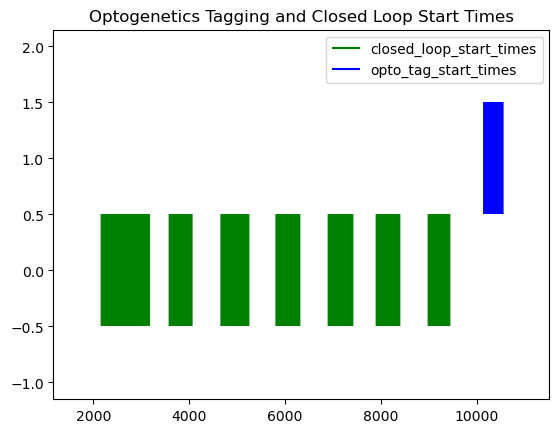

In [15]:

plt.eventplot([opto_closed_loop_start_times,opto_tag_start_times], orientation='horizontal', colors=['g','b'])
plt.xlim(opto_tag_start_times[0]-9000, opto_tag_start_times[-1]+1000)
plt.legend(['closed_loop_start_times','opto_tag_start_times'])
plt.title('Optogenetics Tagging and Closed Loop Start Times')
plt.show()

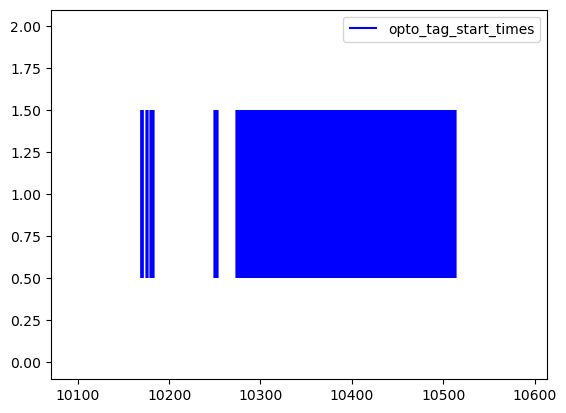

In [16]:
plt.eventplot([opto_tag_start_times], orientation='horizontal', colors=['b'])
plt.xlim(opto_tag_start_times[0]-100, opto_tag_start_times[-1]+100)
plt.legend(['opto_tag_start_times'])
plt.show()


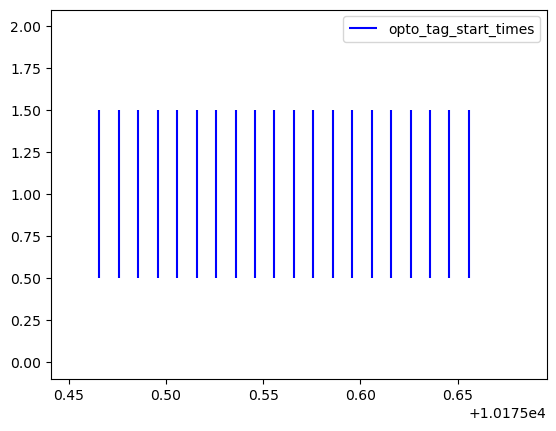

In [17]:
plt.eventplot([opto_tag_start_times], orientation='horizontal', colors=['b'])
plt.xlim(opto_tag_start_times[40]-0.025, opto_tag_start_times[40]+0.23)
plt.legend(['opto_tag_start_times'])
plt.show()

In [18]:
reachInit = df_curate['reachInit'].values

# Filter out 0 values using list comprehension
reachInit_filtered = [x for x in reachInit if x != 0]
print(reachInit_filtered)

# Step 2: Use the indices from reachInit_filtered to select rows from df_filtered
# Assuming reachInit_filtered contains the reset index values, use iloc to select by position
reachInit_start_times = frame_events_df.iloc[reachInit_filtered]['start_time'].tolist()

# turn start_times into a numpy array
reachInit_start_times = np.array(reachInit_start_times)
print(reachInit_start_times[0:5])

[86811, 174721, 286165, 332045, 342489, 356775, 360515, 363552, 383907, 442729, 506100, 511118, 601631, 768722, 793619, 806314, 912517, 920998, 999343, 1008355, 1059521]
[2519.345    3105.453675 3848.46695  4154.355525 4223.9872  ]


### 2. using _events.txt extract out the frame numbers for T5000, T6000, pellet_delivery, pellet_detected

In [19]:
# Initialize empty lists for T6000 and T5000 values
T6000_played_values = []
T5000_played_values = []
pellet_detected_values = []
pellet_delivery_values = []

events_txt_path = r"Z:\PHYS\ChristieLab\Lab Management\Grant\reachingData\compressed_data\20241114\christielab\session010\20241114_christielab_session010_events.txt"
# Open and read the text file
with open(events_txt_path, 'r') as file:
    for line in file:
        # Strip any extra whitespace
        line = line.strip()

        # Check if the line starts with 'T6000_played' and extract the associated value
        if line.startswith('T6000_played'):
            value = int(line.split()[1])
            T6000_played_values.append(value)

        # Check if the line starts with 'T5000_played' and extract the associated value
        elif line.startswith('T5000_played'):
            value = int(line.split()[1])
            T5000_played_values.append(value)

             # Check if the line starts with 'T5000_played' and extract the associated value
        elif line.startswith('pellet_delivery'):
            value = int(line.split()[1])
            pellet_delivery_values.append(value)

        elif line.startswith('pellet_detected'):
                    value = int(line.split()[1])
                    pellet_detected_values.append(value)
# Print the results
print(f"T5000_played frame Number: {T5000_played_values}")
print(f"pellet_delivery frame Numbe: {pellet_delivery_values}")
print(f"T6000_played frame Numbe: {T6000_played_values}")
print(f"pellet_detected frame Numbe: {pellet_detected_values}")



T5000_played frame Number: [1829, 4002, 6102, 8164, 10601, 13227, 15925, 18250, 20726, 23091, 25190, 27289, 29352, 31565, 34227, 36589, 39476, 41577, 43676, 45738, 47876, 49938, 52037, 54251, 56313, 58713, 60887, 63024, 65614, 68726, 70976, 73113, 77013, 79076, 81250, 83351, 85450, 87513, 89612, 91713, 93886, 95948, 98199, 102436, 106598, 108698, 110761, 113123, 115196, 117362, 119463, 121561, 124075, 126773, 128836, 130936, 133037, 135211, 137460, 139545, 141622, 143722, 146234, 148336, 150659, 152797, 154972, 157218, 159284, 161384, 163483, 165771, 167908, 170532, 172633, 174771, 176869, 178969, 181219, 183393, 185456, 187556, 189693, 191794, 196406, 198467, 200717, 202818, 206416, 208593, 210692, 212791, 214853, 216953, 219128, 221229, 224640, 226703, 228802, 230941, 233039, 235139, 237202, 239264, 241401, 243614, 246239, 248488, 251001, 253102, 255163, 257939, 260074, 262626, 264684, 266789, 270123, 272567, 274621, 276760, 278795, 283441, 285629, 287693, 289696, 296497, 298552, 300

### Using the frame_events_df get the actual timestamps for the frame numbers associated with the T6000_played, T5000_played, pellet_delivery, and pellet_detected values

In [20]:
T6000_start_times = frame_events_df.iloc[T6000_played_values]['start_time'].tolist()
T5000_start_times = frame_events_df.iloc[T5000_played_values]['start_time'].tolist()
pellet_delivery_start_times = frame_events_df.iloc[pellet_delivery_values]['start_time'].tolist()
pellet_detected_start_times = frame_events_df.iloc[pellet_detected_values]['start_time'].tolist()
event_times = df_stim[(df_stim.stimulus == 'pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values


print(T6000_start_times[0], T5000_start_times[0], pellet_delivery_start_times[0], pellet_detected_start_times[0])
print(T6000_start_times[1], T5000_start_times[1], pellet_delivery_start_times[1], pellet_detected_start_times[1])
print(T6000_start_times[2], T5000_start_times[2], pellet_delivery_start_times[2], pellet_detected_start_times[2])
print(T6000_start_times[3], T5000_start_times[3], pellet_delivery_start_times[3], pellet_detected_start_times[3])

1945.6574 1946.224075 1946.2041 1946.697475
1959.6517 1960.7118 1960.691775 1961.205175
1974.152775 1974.7128 1974.692775 1975.206175
1987.900425 1988.46045 1988.440425 1988.9405


### Compare the start_times from the frame_events_df with the digital line TTLs

In [21]:
print(tone1_start_times[0],tone2_start_times[0],tone1_start_times[-1],tone2_start_times[-1])
print(T6000_start_times[0], T5000_start_times[0],T5000_start_times[-1],T6000_start_times[-1])

2188.344875 2188.907875 9417.100475 9417.659475
1945.6574 1946.224075 9050.03975 9049.473075


### 4. evaluating the time differences between the matched event times and start times

In [22]:
# event_times = df_stim[(df_stim.stimulus == 'pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values
# start_times = pellet_delivery_start_times

# # Ensure the start_times are sorted, and map them to the nearest event_times
# def map_start_to_event_times(event_times, start_times):
#     event_times = np.array(event_times)
#     start_times = np.array(start_times)
    
#     # Find the closest event time for each start time
#     closest_event_indices = np.array([np.abs(event_times - start_time).argmin() for start_time in start_times])
#     print(closest_event_indices)

    
#     # Extract the corresponding event_times
#     matched_event_times = event_times[closest_event_indices]
    
#     # Calculate the difference between matched event times and start times (to analyze the shift)
#     time_differences = start_times - matched_event_times
    
#     return matched_event_times, time_differences

# # Example of using the function with your data
# matched_event_times, time_differences = map_start_to_event_times(event_times, start_times)

In [23]:
# start_times = pellet_delivery_values
# # Calculate time differences (absolute difference in seconds)
# time_differences = np.abs(matched_event_times[:len(start_times)] - start_times)

# # Convert the differences to milliseconds (ms) for easier interpretation
# time_differences_ms = time_differences * 1000  # Convert from seconds to milliseconds

# # Format the time differences to 4 decimal places
# formatted_time_differences = [f"{td:.4f}" for td in time_differences_ms]

# # Find indices of outliers where the time difference is greater than 400ms
# outlier_indices = np.where(time_differences_ms > 1000)[0]
# outliers = start_times[outlier_indices]
# outlier_differences = time_differences_ms[outlier_indices]

# # Output formatted time differences, outliers with their differences, and indices
# print(f"Formatted Time Differences (ms): {formatted_time_differences}")
# print(f"Outliers (time differences > 400ms): {outliers}")
# # print(f"Outlier Time Differences (ms): {outlier_differences}")
# print(f"Indices of Outliers: {outlier_indices}")
# print(f"Number of Outliers: {len(outliers)}")

# Check Data



In [24]:
for i in range(10):
    print(tone1_start_times[i], tone2_start_times[i])
print('')
for i in range(10):
    print(tone1_start_times[i] - tone2_start_times[i])
stimROI_start_times
print('')
for i in range(100):
    print(stimROI_start_times[i] - tone2_start_times[i])


2188.344875 2188.907875
2202.3437 2203.396675
2216.8545 2217.3965
2230.595325 2231.14535
2246.842125 2247.397125
2264.351925 2264.902925
2282.3517 2282.8937
2297.8415 2298.3945
2314.343275 2314.9013
2329.6051 2330.6691

-0.5630000000001019
-1.0529750000000604
-0.5419999999999163
-0.5500250000000051
-0.5549999999998363
-0.5509999999999309
-0.5419999999999163
-0.5529999999998836
-0.5580249999998159
-1.0639999999998508

-0.05154999999967913
-0.052775000000110595
-0.05102499999975407
-0.05294999999978245
-0.05007500000010623
-0.04779999999982465
-0.05057500000020809
-0.05002500000000509
-0.049399999999877764
-0.053699999999935244
-0.05252500000005966
-0.04942499999970096
-0.05427499999996144
-0.05187500000010914
-0.05252500000005966
-0.04919999999992797
-0.052524999999604916
-0.053325000000313594
-0.0531250000003638
-0.051750000000083674
-0.05040000000008149
-0.05117500000005748
-0.05385000000023865
-0.05234999999993306
-0.050200000000131695
-0.05315000000018699
-0.05420000000003711
0.0249

In [29]:
df1 = df_units[df_units.probe == 'A'][df_units.KSlabel == 2]
df1

C:\Users\user\AppData\Local\Temp\ipykernel_53312\1551580575.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == 'A'][df_units.KSlabel == 2]


,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
0,621.0,0.0,0.0,2,2,10.9,3.0,A,"[1934.0196770880177, 1934.129507155167, 1934.2..."
1,621.0,0.0,0.0,2,2,12.4,6.8,A,"[1935.340571139909, 1936.0745826448222, 1936.8..."
5,621.0,0.0,0.0,2,2,28.5,0.0,A,"[1934.110974372971, 1935.032713628471, 1937.54..."
9,621.0,0.0,0.0,0,2,26.1,1.6,A,"[1934.028343496958, 1934.054909373595, 1934.08..."
10,621.0,0.0,0.0,0,2,15.3,5.8,A,"[1934.0996413766645, 1934.1561396964878, 1934...."
...,...,...,...,...,...,...,...,...,...
347,621.0,0.0,0.0,0,2,42.1,0.0,A,"[7917.647799473373, 7917.6677988786205, 7917.6..."
353,621.0,0.0,0.0,0,2,14.6,0.0,A,"[7917.647832805716, 7917.657799175997, 7917.66..."
363,621.0,0.0,0.0,0,2,21.3,0.0,A,"[7917.647866138057, 7917.657832508339, 7917.66..."


In [26]:
df_unit = df1.iloc[1]
df_unit
spike_times = df_unit.spike_times
print(len(spike_times))
print(spike_times[0:5])
print(spike_times[-5:-1])

# sort spiketimes by ascending order
spike_times = np.sort(spike_times) 
print(spike_times[0:5])
print(spike_times[-5:-1])


37844
[1935.34057114 1936.07458264 1936.88789179 1937.42534248 1937.83846352]
[8072.93164823 8077.3657497  8084.76232973 8177.0309858 ]
[1935.34057114 1936.07458264 1936.88789179 1937.42534248 1937.83846352]
[8072.93164823 8077.3657497  8084.76232973 8177.0309858 ]


# Simple raster 
- This raster plot is working.(no other raster plots are currently working lol)
- it has different logic than all other raster plots so far...


C:\Users\user\AppData\Local\Temp\ipykernel_23468\408671499.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


array([<Axes: title={'center': 'PSTH'}, xlabel='Time [s]', ylabel='Firing Rate [Hz]'>,
       <Axes: >], dtype=object)

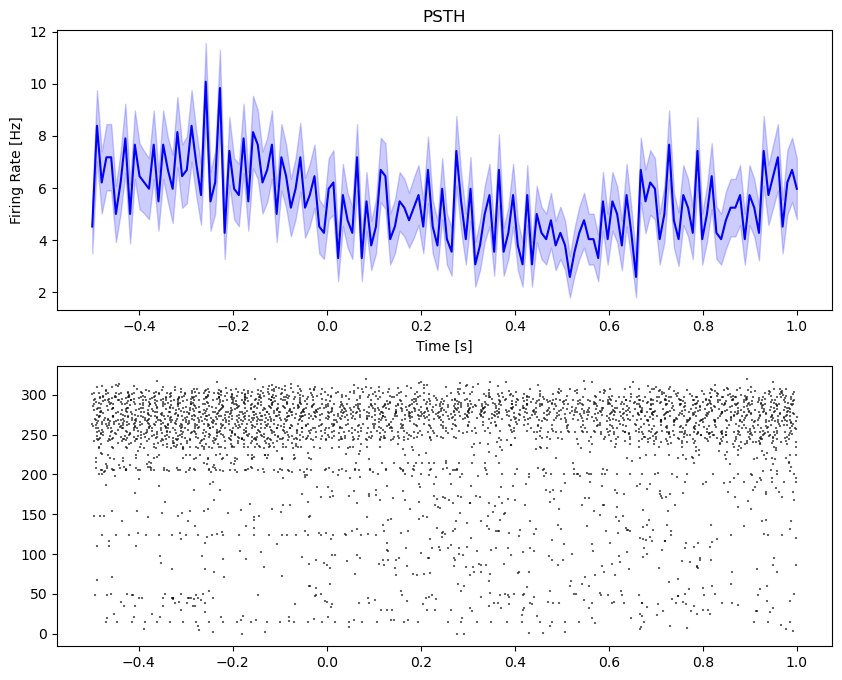

In [103]:


def singleUnit_psth_raster_test(spike_times, event_times, pre, post, bin_size=0.01):
    fig, ax = plt.subplots(2,1)  # Initialize the plot
    fig.set_size_inches(10, 8)  # Set the figure size

    psth,var,edges,bytrial = trial_by_trial(spike_times, event_times, pre, post, bin_size)

    mean_baseline = bytrial[:,:int(pre/bin_size)].mean()
    std_baseline  = bytrial[:,:int(pre/bin_size)].std()
    zMean         = (bytrial[:,int(pre/bin_size):].mean(axis=1) - mean_baseline)/std_baseline

    # mean_response = bytrial[:,int(pre/bin_size):].mean()
    # std_response  = bytrial[:,int(pre/bin_size):].std()

    n_bins = len(psth)
    ax[0].plot(edges,psth-mean_baseline,color='b')
    # ax.set_xticks(np.linspace(0,n_bins,6),np.round(np.linspace(-pre,post,6),1))
    # ax.fill_between(np.arange(0,n_bins),psth+var-mean_baseline,psth-var-mean_baseline,alpha=0.2,color='b')
    ax[0].fill_between(edges,psth+var-mean_baseline,psth-var-mean_baseline,alpha=0.2,color='b')

    ax[0].set_ylabel('Firing Rate [Hz]')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_title('PSTH')


    for t, time in enumerate(event_times):
        trial_spikes = spike_times[(spike_times > time-pre) & (spike_times < time+post)]
        trial_spikes = trial_spikes - time
        # print(f'trial_spikes: {trial_spikes[0:5]}')
        # print(f'time-post: {time-post}')
        # print(f'time+post: {time+post}')

        ax[1].scatter(trial_spikes,
                [t] * len(trial_spikes),  # Use `t` as the y-value for each trial
                marker='|',
                color='black',
                s=1,
                alpha=0.6)

    return ax


unit_idx = 5
pre = 0.5
post = 1
probeLetter ='A'
df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
spike_times = df1.spike_times.values[unit_idx]
event_times = stimROI_start_times
singleUnit_psth_raster_test(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=0.01)




In [105]:
import matplotlib.pyplot as plt
import os

def allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=None, label=False, KSlabel=False,all_units=True, dot_size=0.5, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_delivery_timestamp', probeLetter=None, save_dir=None):
    # Select units based on the label or KSlabel
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  
    if all_units:
        df1 = df_units[df_units.probe == probeLetter]

    unit_index = df1.index.tolist()

    # Loop through each unit
    for unit in unit_index:
        # Create a figure for each unit
        fig, ax = plt.subplots(2, 1, figsize=(10, 15))
        fig.suptitle(f"unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Retrieve spike times for the unit
        spike_times = df1[df1.index == unit].spike_times.values[0]

        # Compute the PSTH and plot it
        psth, var, edges, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)

        # PSTH plot
        mean_baseline = bytrial[:, :int(pre/bin_size)].mean()
        ax[0].plot(edges, psth - mean_baseline, color='b')
        ax[0].fill_between(edges, psth + var - mean_baseline, psth - var - mean_baseline, alpha=0.2, color='b')
        ax[0].set_ylabel('Firing Rate [Hz]')
        ax[0].set_xlabel('Time [s]')
        ax[0].set_title('PSTH')

        # Raster plot
        for t, time in enumerate(event_times):
            trial_spikes = spike_times[(spike_times > time - pre) & (spike_times < time + post)]
            trial_spikes = trial_spikes - time
            ax[1].scatter(trial_spikes, [t] * len(trial_spikes), marker='|', color='black', s=1, alpha=0.6)

        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Ensure save_dir exists
        if save_dir and not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Save the figure
        fig_filename = rf"{save_dir}\unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(fig)  # Close the figure to free up memory



In [204]:

# General parameters
event_times = opto_closed_loop_start_times
KSlabel = True
label = False
all_units = False

# Probe A
probeLetter = 'A'
brain_region = 'SIM_IP'
pre = 0.5
post = 1
bin_size = 0.01
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeA\05_1\opto_closed_loop"
allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units, probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




# Probe B
probeLetter = 'B'
brain_region = 'PG'
pre = 0.5
post = 1
bin_size = 0.01
# T6000 start times
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeB\05_1\opto_closed_loop"
allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units,probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




# Probe D
probeLetter = 'D'
brain_region = 'VaL'
pre = 0.5
post = 1
bin_size = 0.01
# T6000 start times
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeD\05_1\opto_closed_loop"
allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel,all_units=all_units, probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)



# Probe E
probeLetter = 'E'
brain_region = 'SnR'
pre = 0.5
post = 1
bin_size = 0.01
# T6000 start times
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeE\05_1\opto_closed_loop"
allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units,probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


In [205]:

# General parameters
event_times = opto_tag_start_times
KSlabel = True
label = False
all_units = False

# Probe A
probeLetter = 'A'
brain_region = 'SIM_IP'
pre = 0.5
post = 1
bin_size = 0.01
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeA\05_1\opto_tag"
allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units, probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




# Probe B
probeLetter = 'B'
brain_region = 'PG'
pre = 0.5
post = 1
bin_size = 0.01
# T6000 start times
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeB\05_1\opto_tag"
allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units,probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)




# Probe D
probeLetter = 'D'
brain_region = 'VaL'
pre = 0.5
post = 1
bin_size = 0.01
# T6000 start times
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeD\05_1\opto_tag"
allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel,all_units=all_units, probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)



# Probe E
probeLetter = 'E'
brain_region = 'SnR'
pre = 0.5
post = 1
bin_size = 0.01
# T6000 start times
save_dir = r"G:\Grant\neuropixels\kilosort_recordings\reach3_01_2024-11-14_21-30-18_001\analysis\dlab_raster_psth\allUnits_psth_raster_2\probeE\05_1\opto_tag"
allUnits_psth_raster_2(df_units, df_stim, brain_region, event_times=event_times, KSlabel=KSlabel, all_units=all_units,probeLetter=probeLetter, save_dir=save_dir, pre=pre, post=post, bin_size=bin_size)

C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


C:\Users\user\AppData\Local\Temp\ipykernel_23468\928786618.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]


using KSlabel


# NOTHING BELLOW HERE IS WORKING CORRECTLY

## Old non working code

In [ ]:
import os

def allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=False, KSlabel=False,dot_size=0.5,pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_delivery_timestamp', save_dir=None):
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  

    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 2 subplots
        f, ax = plt.subplots(2, 1, figsize=(10, 15))
        f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the PSTH in the first subplot
        ax[0].set_facecolor('white')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')

        # this is to be able to get data for the raster plot, by using bytrial
        psth, var, edges, bytrial = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=binSizeRaster
        )

        # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
        psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=0.025
        )
        
        ax[0].plot(edges_1, psth_1)
        ax[0].set_title("PSTH")

        # Plot the raster plot in the second subplot
        ax[1].set_facecolor('white')
        ax[1].tick_params(color='black', labelcolor='black')
        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')
        
        # for trial_idx, trial in enumerate(bytrial):
        #     spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
        #     ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Plot raster using bytrial
        for trial_idx, trial in enumerate(bytrial):
            plt.scatter(np.where(trial > 0)[0] * binSizeRaster - pre, [trial_idx] * np.count_nonzero(trial), color='black', s=dot_size)

        
        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Save the figure
        fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(f)  # Close the figure to free up memory and avoid display

        # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


In [ ]:
label = False
KSlabel = True
pre = 3
post = 3
binSizeRaster = 0.001
binsizePsth = 0.025
dot_size = 0.25
epoch1 = 'pellet_delivery_timestamp'
Savefig= True


save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeA\3s_3s"
probeLetter = "A"
brain_region = 'SIM_IP'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

## Epoch Raster Psth plots for every unit from a probe
-   This function works by you Selecting the epoch you want to use for time zero (this works by using the stimulus column in df_stim, and calling the associated timestamps in every row time zero for the plots )

In [16]:
import os

def allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=False, KSlabel=False,dot_size=0.5,pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_delivery_timestamp', save_dir=None):
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  

    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 2 subplots
        f, ax = plt.subplots(2, 1, figsize=(10, 15))
        f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the PSTH in the first subplot
        ax[0].set_facecolor('white')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')

        # this is to be able to get data for the raster plot, by using bytrial
        psth, var, edges, bytrial = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=binSizeRaster
        )

        # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
        psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=0.025
        )
        
        ax[0].plot(edges_1, psth_1)
        ax[0].set_title("PSTH")

        # Plot the raster plot in the second subplot
        ax[1].set_facecolor('white')
        ax[1].tick_params(color='black', labelcolor='black')
        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')
        
        # for trial_idx, trial in enumerate(bytrial):
        #     spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
        #     ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Plot raster using bytrial
        for trial_idx, trial in enumerate(bytrial):
            plt.scatter(np.where(trial > 0)[0] * binSizeRaster - pre, [trial_idx] * np.count_nonzero(trial), color='black', s=dot_size)

        
        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Save the figure
        fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(f)  # Close the figure to free up memory and avoid display

        # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


In [ ]:
label = False
KSlabel = True
pre = 3
post = 3
binSizeRaster = 0.001
binsizePsth = 0.025
dot_size = 0.25
epoch1 = 'pellet_delivery_timestamp'
Savefig= True


save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeA\3s_3s"
probeLetter = "A"
brain_region = 'SIM_IP'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeB\3s_3s"
probeLetter = "B"
brain_region = 'SnR'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeC\3s_3s"
probeLetter = "C"
brain_region = 'MoP'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label, dot_size=dot_size,KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeD\3s_3s"
probeLetter = "D"
brain_region = 'VL'
allUnits_psth_raster_epoch(df_units, df_stim, probeLetter, brain_region, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

In [ ]:
df_stim.stimulus.unique()

## Selected Event_times Raster Psth plots for every unit from a probe
-   This function works by you Selecting the specifc event_times you want to use for time zero (ie. T5000_played, Pellet_deleivey, T6000_played, pellet_detected) 
- this works by taking in an array of timestamps, which should be relative to the neuropixel clock, and calling each value in that array time zero for the plots
- Mostly the timestamps are made by using the frame_numbers stimulus in the df_stim, since all frame numbers are recorded, indexing into that frame gives you the relaztuve time it occured for the neuropixel

In [135]:
import os

def allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region,event_times_to_use=None,label=False, KSlabel=False,dot_size=0.5,pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_delivery_timestamp', save_dir=None):
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  

    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 2 subplots
        f, ax = plt.subplots(2, 1, figsize=(10, 15))
        f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the PSTH in the first subplot
        ax[0].set_facecolor('white')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')

        # this is to be able to get data for the raster plot, by using bytrial
        psth, var, edges, bytrial = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == 'pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=binSizeRaster
        )

        # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
        psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == 'pellet_delivery_timestamp') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=0.025
        )
        
        ax[0].plot(edges_1, psth_1)
        ax[0].set_title("PSTH")

        # Plot the raster plot in the second subplot
        ax[1].set_facecolor('white')
        ax[1].tick_params(color='black', labelcolor='black')
        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')
        
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)
        
        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Save the figure
        fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(f)  # Close the figure to free up memory and avoid display

        # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


In [ ]:
# event_times_to_use options
print(T6000_start_times[0], T5000_start_times[0], pellet_delivery_start_times[0], pellet_detected_start_times[0])
print(T6000_start_times[0]-T5000_start_times[0],T6000_start_times[0]-pellet_delivery_start_times[0],T6000_start_times[0]-pellet_detected_start_times[0])
print(T6000_start_times[1]-T5000_start_times[1],T6000_start_times[1]-pellet_delivery_start_times[1],T6000_start_times[1]-pellet_detected_start_times[1])
print(T6000_start_times[2]-T5000_start_times[2],T6000_start_times[2]-pellet_delivery_start_times[2],T6000_start_times[2]-pellet_detected_start_times[2])
print(T6000_start_times[3]-T5000_start_times[3],T6000_start_times[3]-pellet_delivery_start_times[3],T6000_start_times[3]-pellet_detected_start_times[3])




In [ ]:
import os

# Define parameters
label = False
KSlabel = True
pre = 3
post = 3
binSizeRaster = 0.001
binsizePsth = 0.025
dot_size = 0.25
Savefig = True
event_times_to_use = T6000_start_times

# Function to check and create the folder based on the save_dir and pre/post
def create_save_dir(save_dir, pre, post):
    pre_post_folder = f"{pre}_{post}"
    full_save_dir = os.path.join(save_dir, pre_post_folder)
    if not os.path.exists(full_save_dir):
        os.makedirs(full_save_dir)
        print(f"Created directory: {full_save_dir}")
    return full_save_dir

# Probe A
save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeA\T6000_start_times"
probeLetter = "A"
brain_region = 'SIM_IP'

# Check/create folder and pass the new save_dir to the function
full_save_dir_A = create_save_dir(save_dir, pre, post)
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, 
                                       event_times_to_use=event_times_to_use, label=label, 
                                       dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, 
                                       binSizeRaster=binSizeRaster, save_dir=full_save_dir_A)

# Probe B
save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeB\T6000_start_times"
probeLetter = "B"
brain_region = 'SnR'

# Check/create folder and pass the new save_dir to the function
full_save_dir_B = create_save_dir(save_dir, pre, post)
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, 
                                       event_times_to_use=event_times_to_use, label=label, 
                                       dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, 
                                       binSizeRaster=binSizeRaster, save_dir=full_save_dir_B)

# Probe C
save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeC\T6000_start_times"
probeLetter = "C"
brain_region = 'MoP'

# Check/create folder and pass the new save_dir to the function
full_save_dir_C = create_save_dir(save_dir, pre, post)
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, 
                                       event_times_to_use=event_times_to_use, label=label, 
                                       dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, 
                                       binSizeRaster=binSizeRaster, save_dir=full_save_dir_C)

# Probe D
save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeD\T6000_start_times"
probeLetter = "D"
brain_region = 'VL'

# Check/create folder and pass the new save_dir to the function
full_save_dir_D = create_save_dir(save_dir, pre, post)
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, 
                                       event_times_to_use=event_times_to_use, label=label, 
                                       dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, 
                                       binSizeRaster=binSizeRaster, save_dir=full_save_dir_D)


In [ ]:
label = False
KSlabel = True
pre = 2
post = 10
binSizeRaster = 0.001
binsizePsth = 0.025
dot_size = 0.25
Savefig= True
event_times_to_use = T6000_start_times


save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeA"
probeLetter = "A"
brain_region = 'SIM_IP'
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region,event_times_to_use=event_times_to_use, label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeB"
probeLetter = "B"
brain_region = 'SnR'
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region, event_times_to_use=event_times_to_use,label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeC"
probeLetter = "C"
brain_region = 'MoP'
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region,event_times_to_use=event_times_to_use ,label=label, dot_size=dot_size,KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\trial_by_trial\probeD"
probeLetter = "D"
brain_region = 'VL'
allUnits_psth_raster_select_eventTimes(df_units, df_stim, probeLetter, brain_region,event_times_to_use=event_times_to_use ,label=label,dot_size=dot_size, KSlabel=KSlabel, pre=pre, post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

## Single unit raster and PSTH aligned to reachInit


In [261]:
# import os

# def allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times,dot_size=0.5, label=False, KSlabel=False,use_reachInit=True,use_epoch=False, pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_delivery_timestamp', save_dir=None):
   
#     if label:
#         df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
#         print('using label')
#     if KSlabel:
#         df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
#         print('using KSlabel')  

#     unit_index = df1.index.tolist()

#     for unit in unit_index:
#         # Create a single figure with 2 subplots
#         f, ax = plt.subplots(2, 1, figsize=(10, 15))
#         f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

#         # Plot the PSTH in the first subplot
#         ax[0].set_facecolor('white')
#         ax[0].tick_params(color='black', labelcolor='black')
#         for spine in ax[0].spines.values():
#             spine.set_edgecolor('black')

        

#         if use_reachInit:
#             # this is to be able to get data for the raster plot, by using bytrial
#             psth, var, edges, bytrial = trial_by_trial(
#                 spike_times=df1[df1.index == unit].spike_times.values[0],
#                 event_times=start_times,
#                 pre=pre, post=post, bin_size=binSizeRaster
#             )

#             # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
#             psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
#                 spike_times=df1[df1.index == unit].spike_times.values[0],
#                 event_times=start_times,
#                 pre=pre, post=post, bin_size=0.025
#             )

#         if use_epoch:
#             # this is to be able to get data for the raster plot, by using bytrial
#             psth, var, edges, bytrial = trial_by_trial(
#                 spike_times=df1[df1.index == unit].spike_times.values[0],
#                 event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
#                 pre=pre, post=post, bin_size=binSizeRaster
#             )

#             # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
#             psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
#                 spike_times=df1[df1.index == unit].spike_times.values[0],
#                 event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
#                 pre=pre, post=post, bin_size=0.025
#             )
        
            
#         ax[0].plot(edges_1, psth_1)
#         ax[0].set_title("PSTH")

#         # Plot the raster plot in the second subplot
#         ax[1].set_facecolor('white')
#         ax[1].tick_params(color='black', labelcolor='black')
#         for spine in ax[1].spines.values():
#             spine.set_edgecolor('black')
        
#         for trial_idx, trial in enumerate(bytrial):
#             spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
#             ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)
        
#         ax[1].set_title("Raster Plot")
#         ax[1].set_ylabel("Trial")
#         ax[1].set_xlabel("Time (s)")

#         # Save the figure
#         fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
#         plt.savefig(fig_filename, bbox_inches='tight')
#         plt.close(f)  # Close the figure to free up memory and avoid display

#         # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


In [378]:
# probeLetter = "ChangeMe"
# brain_region = "ChangeMe"
# save_dir = "ChangeMe"

# label = False
# KSlabel = True
# pre = 0.5
# post = 1
# binSizeRaster = 0.001
# binsizePsth = 0.025
# dot_size = 0.75
# Savefig= True

# ##---- Set your start time -----
# #start_times = reachInit_start_times
# #start_times = T5000_start_times
# #start_times = T6000_start_times
# start_times = pellet_delivery_start_times
# #start_times = pellet_detected_start_times

# ### --- SET THIS ---
# use_reachInit = True
# use_epoch = False


# save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\allUnits_psth_raster_select_startTime\probeA\pellet_delivery\0.5s_1s"
# probeLetter = "A"
# brain_region = 'SIM_IP'
# allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times, label=label, KSlabel=KSlabel,use_reachInit=use_reachInit,use_epoch=use_epoch ,pre=pre,dot_size=dot_size ,post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

# save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\allUnits_psth_raster_select_startTime\probeB\T5000_played\0.5s_1s"
# probeLetter = "B"
# brain_region = 'SnR'
# allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times, label=label, KSlabel=KSlabel,use_reachInit=use_reachInit,use_epoch=use_epoch ,pre=pre,dot_size=dot_size ,post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

# save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\allUnits_psth_raster_select_startTime\probeC\T5000_played\0.5s_1s"
# probeLetter = "C"
# brain_region = 'MoP'
# allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times, label=label, KSlabel=KSlabel,use_reachInit=use_reachInit,use_epoch=use_epoch ,pre=pre,dot_size=dot_size ,post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)

# save_dir = r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\allUnits_psth_raster_select_startTime\probeD\T5000_played\0.5s_1s"
# probeLetter = "D"
# brain_region = 'VL'
# allUnits_psth_raster_select_startTime(df_units, probeLetter, brain_region,start_times=start_times, label=label, KSlabel=KSlabel,use_reachInit=use_reachInit,use_epoch=use_epoch ,pre=pre,dot_size=dot_size ,post=post, binSizeRaster=binSizeRaster, epoch1=epoch1, save_dir=save_dir)


## Plot the PSTH and raster for all units in probe 
- this saves on figure for each unit in a probe, this figure has a psth and raster plot
- you can toggle between KSlabel and label (KSlabel = Kilosort's "good" units), (label = your PHY curaterd "good" units)

In [ ]:
import os

def allUnits_psth_raster_figures(df_units, df_stim, probeLetter, brain_region, label=False, KSlabel=False, pre=0.5, post=1, binSizeRaster=0.05, epoch1='pellet_detected_timestamp', save_dir=None):
    if label:
        df1 = df_units[df_units.probe == probeLetter][df_units.label == 2]
        print('using label')
    if KSlabel:
        df1 = df_units[df_units.probe == probeLetter][df_units.KSlabel == 2]
        print('using KSlabel')  

    unit_index = df1.index.tolist()

    for unit in unit_index:
        # Create a single figure with 2 subplots
        f, ax = plt.subplots(2, 1, figsize=(10, 15))
        f.suptitle(f"Aligned to pellet detected; unit {unit}, probe {probeLetter} in {brain_region}", color='black')

        # Plot the PSTH in the first subplot
        ax[0].set_facecolor('white')
        ax[0].tick_params(color='black', labelcolor='black')
        for spine in ax[0].spines.values():
            spine.set_edgecolor('black')

        # this is to be able to get data for the raster plot, by using bytrial
        psth, var, edges, bytrial = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=binSizeRaster
        )

        # this is to be able to set a different bin size for the PSTH plot, by using edges_1 and psth_1
        psth_1, var_1, edges_1, bytrial_1 = trial_by_trial(
            spike_times=df1[df1.index == unit].spike_times.values[0],
            event_times=df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values,
            pre=pre, post=post, bin_size=0.025
        )
        
        ax[0].plot(edges_1, psth_1)
        ax[0].set_title("PSTH")

        # Plot the raster plot in the second subplot
        ax[1].set_facecolor('white')
        ax[1].tick_params(color='black', labelcolor='black')
        for spine in ax[1].spines.values():
            spine.set_edgecolor('black')
        
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax[1].scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=1)
        
        ax[1].set_title("Raster Plot")
        ax[1].set_ylabel("Trial")
        ax[1].set_xlabel("Time (s)")

        # Save the figure
        fig_filename = f"{save_dir}/unit_{unit}_probe_{probeLetter}_region_{brain_region}.png"
        plt.savefig(fig_filename, bbox_inches='tight')
        plt.close(f)  # Close the figure to free up memory and avoid display

        # print(f"Saved figure for unit {unit} as {fig_filename} to {save_dir}")


## multi-brain region raster plots 

In [102]:
import os
import matplotlib.pyplot as plt
import numpy as np

def multiRegion_raster_figures(df_units, df_stim, brain_regions, 
                               probe_units, probe_letters=['A', 'B', 'C', 'D'], 
                               label=False, KSlabel=False, 
                               pre=0.5, post=1, binSizeRaster=0.05, 
                               epoch1='pellet_delivery_timestamp', save_dir=None, 
                               highlight_time_zero=False,dot_size=0.25, background_colors=None):
    # Prepare unit filtering based on label or KSlabel
    label_key = 'label' if label else 'KSlabel' if KSlabel else None
    if label_key:
        df_probes = [df_units[(df_units.probe == probe) & (df_units[label_key] == 2)] 
                     for probe in probe_letters]
    else:
        df_probes = [df_units[df_units.probe == probe] for probe in probe_letters]

    # Create a figure with stacked subplots for each region
    fig, axs = plt.subplots(len(probe_letters), 1, figsize=(10, len(probe_letters)*2), sharex=True)
    fig.suptitle(f"Aligned to {epoch1}; Units {probe_units} in {brain_regions}", color='black')

    # If no background colors are provided, default to light pastel shades
    if background_colors is None:
        background_colors = ['#f0f8ff', '#fafad2', '#e6e6fa', '#fff0f5']  # Example pastel colors

    for i, (probe, unit, region, ax) in enumerate(zip(probe_letters, probe_units, brain_regions, axs)):
        # Fetch unit's data
        df_probe = df_probes[i]
        if unit not in df_probe.index:
            print(f"Unit {unit} not found for probe {probe}. Skipping.")
            continue
        
        spike_times = df_probe.loc[unit].spike_times
        event_times = df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values

        # Calculate raster data
        _, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                          pre=pre, post=post, bin_size=binSizeRaster)
        
        # Set a unique light color background for each raster plot
        ax.set_facecolor(background_colors[i % len(background_colors)])  # Rotate through provided colors
        ax.tick_params(color='black', labelcolor='black')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Plot raster data
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax.scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Add a gray highlighted box around time zero if the option is enabled
        if highlight_time_zero:
            ax.axvspan(0, 0.001, color='gray', alpha=0.5)  # Thin vertical box at t=0

        ax.set_title(f"Region: {region}, Unit: {unit}")
        ax.set_ylabel(region)

    axs[-1].set_xlabel("Time (s)")
    
    # Save the figure
    fig_filename = os.path.join(save_dir, f"multi_region_raster_units_{probe_units}.png")
    plt.savefig(fig_filename, bbox_inches='tight')
    plt.close(fig)  # Close to free memory
    print(f"Saved multi-region raster plot as {fig_filename}")


In [ ]:
multiRegion_raster_figures(
    df_units=df_units, 
    df_stim=df_stim, 
    epoch1='pellet_delivery_timestamp',
    brain_regions=["SIM",'IP', "SNr", "VL", "MoP"], 
    probe_units=[222,602, 953, 1963,1350],  # specify the units for each probe
    probe_letters=['A','A' ,'B','D', 'C' ], 
    label=False, 
    pre=0.5, post=1, 
    binSizeRaster=0.001, 
    dot_size=0.1,
    highlight_time_zero=True,
    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\multiRegion_raster_figures\test1'
)

## multi-brain region raster & psth plots
- Creates a stacked raster plot for however many probes/brain regions you select
- the PSTH plot is not normalized, do large changes in firing rate will drawf the smaller changes
- the function 

In [1231]:
import matplotlib.colors as mcolors
import os
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors
from colorsys import rgb_to_hls, hls_to_rgb

def make_color_vibrant(color, saturation_increase=0.5, lightness_decrease=0.1):
    """
    Makes the given color more vibrant by increasing saturation and optionally reducing lightness.
    Input should be a valid matplotlib color format.
    `saturation_increase`: Amount to increase the saturation (0 to 1).
    `lightness_decrease`: Amount to decrease lightness (0 to 1).
    """
    # Convert the color to RGB
    rgb = np.array(mcolors.to_rgb(color))
    # Convert RGB to HLS (Hue, Lightness, Saturation)
    h, l, s = rgb_to_hls(*rgb)
    
    # Increase saturation and slightly reduce lightness to make the color more vibrant
    s = min(1, s + saturation_increase)  # Cap saturation at 1
    l = max(0, l - lightness_decrease)  # Ensure lightness doesn't go below 0
    
    # Convert back to RGB
    vibrant_rgb = hls_to_rgb(h, l, s)
    
    # Convert back to HEX for matplotlib
    return mcolors.to_hex(vibrant_rgb)


# Vibrant color function
def make_color_vibrant(color, saturation_increase=0.5, lightness_decrease=0.1):
    rgb = np.array(mcolors.to_rgb(color))
    h, l, s = rgb_to_hls(*rgb)
    s = min(1, s + saturation_increase)  # Increase saturation
    l = max(0, l - lightness_decrease)   # Slightly reduce lightness
    return mcolors.to_hex(hls_to_rgb(h, l, s))

def multiRegion_raster_psth_figures(df_units, df_stim, brain_regions, 
                               probe_units, probe_letters=['A', 'B', 'C', 'D'], 
                               label=False, KSlabel=False,  # Clarified labels
                               pre=0.5, post=1, binSizeRaster=0.05, binSizePSTH=0.025,
                               epoch1='pellet_detected_timestamp', save_dir=None, 
                               highlight_time_zero=False, normalize_psth=False,
                               dot_size=5, background_colors=None):
    # Ensure only one of label or KSlabel is True, raise an error if both are set
    if label and KSlabel:
        raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")
    
    # Prepare unit filtering based on label or KSlabel
    if label:
        df_probes = [df_units[(df_units.probe == probe) & (df_units.label == 2)] for probe in probe_letters]
        print('Using label for filtering.')
    elif KSlabel:
        df_probes = [df_units[(df_units.probe == probe) & (df_units.KSlabel == 2)] for probe in probe_letters]
        print('Using KSlabel for filtering.')
    else:
        df_probes = [df_units[df_units.probe == probe] for probe in probe_letters]
        print('Using all data without filtering.')

    # Create a figure with 1 PSTH plot at the top and stacked subplots for each region
    fig, axs = plt.subplots(len(probe_letters) + 1, 1, figsize=(10, (len(probe_letters) + 1) * 2), sharex=True)
    fig.suptitle(f"Aligned to {epoch1}; Units {probe_units} in {brain_regions}", color='black')

    # If no background colors are provided, default to light pastel shades
    if background_colors is None:
        background_colors = ['#f0f8ff', '#fafad2', '#e6e6fa', '#fff0f5', '#d1e7dd']  # Added a 5th pastel green

    # First plot will be the PSTH plot
    psth_ax = axs[0]

    for i, (probe, unit, region, ax) in enumerate(zip(probe_letters, probe_units, brain_regions, axs[1:])):
        # Fetch unit's data
        df_probe = df_probes[i]
        if unit not in df_probe.index:
            print(f"Unit {unit} not found for probe {probe}. Skipping.")
            continue
        
        spike_times = df_probe.loc[unit].spike_times
        event_times = df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values

        # Calculate raster data with larger bin size
        _, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                          pre=pre, post=post, bin_size=binSizeRaster)

        # Calculate PSTH data with smaller bin size
        psth, _, edges, _ = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                           pre=pre, post=post, bin_size=binSizePSTH)

        # Set a unique light color background for each raster plot
        ax.set_facecolor(background_colors[i % len(background_colors)])  # Rotate through provided colors
        ax.tick_params(color='black', labelcolor='black')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Plot raster data
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax.scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Add a gray highlighted box around time zero if the option is enabled
        if highlight_time_zero:
            ax.axvspan(0, 0.001, color='gray', alpha=0.5)  # Thin vertical box at t=0

        ax.set_title(f"Region: {region}, Unit: {unit}")
        ax.set_ylabel(region)

        # Make the background color more vibrant for the PSTH line
        vibrant_color = make_color_vibrant(background_colors[i % len(background_colors)], saturation_increase=0.5, lightness_decrease=0.1)

        # Add the PSTH line to the top PSTH plot, using the vibrant color
        psth_ax.plot(edges[:-1], psth[:len(edges[:-1])], label=f'{region}', color=vibrant_color, lw=2)

    # Formatting for PSTH plot
    psth_ax.set_title("PSTH - All Brain Regions")
    psth_ax.set_ylabel("Firing Rate")
    psth_ax.legend(loc="upper right")
    psth_ax.set_facecolor('white')
    psth_ax.grid(True)

    # Label the x-axis on the last subplot
    axs[-1].set_xlabel("Time (s)")
    
    # Save the figure
    fig_filename = os.path.join(save_dir, f"multi_region_psth_raster_units_{probe_units}.png")
    plt.savefig(fig_filename, bbox_inches='tight')
    plt.close(fig)  # Close to free memory
    print(f"Saved multi-region PSTH & raster plot as {fig_filename}")


In [ ]:
multiRegion_raster_psth_figures(
    df_units=df_units, 
    df_stim=df_stim, 
    KSlabel=True,  # Use KSlabel filtering
    label=False, 
    epoch1='pellet_delivery_timestamp',
    brain_regions=["SIM",'IP', "SNr", "VL", "MoP"], 
    probe_units=[222,602, 953, 2012,1404],  # specify the units for each probe
    probe_letters=['A','A' ,'B','D', 'C' ], 
    pre=0.5, post=1, 
    binSizeRaster=0.001, 
    binSizePSTH = 0.025,
    dot_size=0.1,
    highlight_time_zero=False,
    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\multiRegion_raster_psth_figures\regular_psth\0.25ms_0.25ms'
)

## Raster Plots w/ Normalized psth
- Allows you to stack multiple probes raster plots
- it also allows you to normalize the change in firing rate for the PSTH plot

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from colorsys import rgb_to_hls, hls_to_rgb

# Vibrant color function
def make_color_vibrant(color, saturation_increase=0.5, lightness_decrease=0.1):
    rgb = np.array(mcolors.to_rgb(color))
    h, l, s = rgb_to_hls(*rgb)
    s = min(1, s + saturation_increase)  # Increase saturation
    l = max(0, l - lightness_decrease)   # Slightly reduce lightness
    return mcolors.to_hex(hls_to_rgb(h, l, s))

def multiRegion_raster_psth_normalized(df_units, df_stim, brain_regions, 
                               probe_units, probe_letters=['A', 'B', 'C', 'D'], 
                               label=False, KSlabel=False,  # Clarified labels
                               pre=0.5, post=1, binSizeRaster=0.05, binSizePSTH=0.025,event_times=None,
                               epoch1='pellet_detected_timestamp', save_dir=None, 
                               highlight_time_zero=False, normalize_psth=False,
                               dot_size=5, background_colors=None):
    # Ensure only one of label or KSlabel is True, raise an error if both are set
    if label and KSlabel:
        raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")
    
    # Prepare unit filtering based on label or KSlabel
    if label:
        df_probes = [df_units[(df_units.probe == probe) & (df_units.label == 2)] for probe in probe_letters]
        print('Using label for filtering.')
    elif KSlabel:
        df_probes = [df_units[(df_units.probe == probe) & (df_units.KSlabel == 2)] for probe in probe_letters]
        print('Using KSlabel for filtering.')
    else:
        df_probes = [df_units[df_units.probe == probe] for probe in probe_letters]
        print('Using all data without filtering.')
        
    # Create a figure with 1 PSTH plot at the top and stacked subplots for each region
    fig, axs = plt.subplots(len(probe_letters) + 1, 1, figsize=(10, (len(probe_letters) + 1) * 2), sharex=True)
    fig.suptitle(f"Aligned to {epoch1}; Units {probe_units} in {brain_regions}", color='black')

    # If no background colors are provided, default to light pastel shades
    if background_colors is None:
        background_colors = ['#f0f8ff', '#FFB347', '#e6e6fa', '#fff0f5', '#d1e7dd']

    # First plot will be the PSTH plot
    psth_ax = axs[0]

    for i, (probe, unit, region, ax) in enumerate(zip(probe_letters, probe_units, brain_regions, axs[1:])):
        # Fetch unit's data
        df_probe = df_probes[i]
        if unit not in df_probe.index:
            print(f"Unit {unit} not found for probe {probe}. Skipping.")
            continue
        
        spike_times = df_probe.loc[unit].spike_times
        event_times = event_times

        # Calculate raster data with larger bin size
        _, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                          pre=pre, post=post, bin_size=binSizeRaster)

        # Calculate PSTH data with smaller bin size
        psth, _, edges, _ = trial_by_trial(spike_times=spike_times, event_times=event_times, 
                                           pre=pre, post=post, bin_size=binSizePSTH)

        # Optionally normalize the PSTH
        if normalize_psth:
            psth = psth / np.max(psth) if np.max(psth) != 0 else psth  # Avoid division by zero

        # Set a unique light color background for each raster plot
        ax.set_facecolor(background_colors[i % len(background_colors)])  # Rotate through provided colors
        ax.tick_params(color='black', labelcolor='black')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Plot raster data
        for trial_idx, trial in enumerate(bytrial):
            spike_times_in_trial = np.where(trial > 0)[0] * binSizeRaster - pre  # convert bin indices back to time
            ax.scatter(spike_times_in_trial, [trial_idx] * len(spike_times_in_trial), color='black', s=dot_size)

        # Add a gray highlighted box around time zero if the option is enabled
        if highlight_time_zero:
            ax.axvspan(0, 0.001, color='gray', alpha=0.5)  # Thin vertical box at t=0

        # ax.set_title(f"Region: {region}, Unit: {unit}")
        # ax.set_ylabel(region)
        ax.set_ylabel(region, rotation=0, labelpad=30, va='center')


        # Make the background color more vibrant for the PSTH line
        vibrant_color = make_color_vibrant(background_colors[i % len(background_colors)], saturation_increase=0.5, lightness_decrease=0.1)

        # Add the PSTH line to the top PSTH plot, using the vibrant color
        psth_ax.plot(edges[:-1], psth[:len(edges[:-1])], label=f'{region}', color=vibrant_color, lw=2)

    # Formatting for PSTH plot
    psth_ax.set_title("PSTH - All Brain Regions")
    psth_ax.set_ylabel("Firing Rate (normalized)" if normalize_psth else "Firing Rate")
    psth_ax.legend(loc="upper right")
    psth_ax.set_facecolor('white')
    psth_ax.grid(True)

    # Label the x-axis on the last subplot
    axs[-1].set_xlabel("Time (s)")
    
    # Save the figure
    fig_filename = os.path.join(save_dir, f"multi_region_psth_raster_units_{probe_units}.png")
    plt.savefig(fig_filename, bbox_inches='tight')
    plt.close(fig)  # Close to free memory
    print(f"Saved multi-region PSTH & raster plot as {fig_filename}")


In [ ]:
probe_units=[632,25, 1017, 2012,1404]  # specify the units for each probe
probe_units=[632,25, 1017, 2012,1865]  # specify the units for each probe

#probe_units = [632, 18, 964, 2000, 1368],  # List of unit numbers, 


multiRegion_raster_psth_normalized(
    df_units=df_units, 
    df_stim=df_stim, 
    epoch1='pellet_delivery_timestamp',
    event_times = reachInit_start_times,
    brain_regions=["SIM",'IP', "SNr", "VL", "MoP"], 
    probe_units = probe_units,  # List of unit numbers, 
    probe_letters=['A','A' ,'B','D', 'C' ], 
    KSlabel=True,  # Use KSlabel filtering
    label=False, 
    pre=2, post=3, 
    binSizeRaster=0.001, 
    binSizePSTH = 0.01,
    dot_size=0.05,
    normalize_psth=True,  # Normalize the PSTH lines
    highlight_time_zero=False,
    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\multiRegion_raster_psth_figures\normalized_psth\2_3\Reachinit'
)


## Check the depth of the units
- Allows you to check the relative depth of each unit 
- Important: the relative depth is compared to what you set probedepth too when making the nwb. For example if you set probeA to probedepth=2500, but the probe was really all the way into the brain (ie. 3800um) the units at the top of the probe will appear as -1300. and the units at the tip of the probe will say 2500, even though they were actually 3800um deep in the brain

In [1147]:
probeids = ['A', 'B','C','D'] 
probedepths = [2500,4500,1000,3800] 

selected_units_A = [0,11,12, 16, 18,19,20,25,26,36,39,49,52,57,62,67,69,88,93,103,137,148,151,152,158,159,176,180,187,188,192,196,197,198,199,212,213,214,218,222,225,226,230,232,236,242,244,249,251,252,253,254,255,256]  # Specify the unit IDs you want to include
selected_units_B = [867,868,869,872,873,875,876,878,879,882,895,896,897,898,901,903,905,911,912,913,914,916,918,920,922,924,926,927,928,929,930,931,933,934,935,936,937,938,939,941,942,944,945,946,947,948,950,951,952,953,954,956,958,959,960,961,962,963,964,967,968,696,971,972,973,975,977,978,979,980,981,983,984,985,986,987,990,992,994,1000,1002,1003,1004,1005,1006,1007,1009,1011,1012,1013,1015,1016,1017,1018,1019,1020,1022,1023,1025,1027,1028,1029,1030,1031,1033,1035,1037,1038,1040,1041,1042,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1056,1057,1059,1060,1063,1065,1066,1067,1068,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,]
selected_units_C = [1334,1349,1350,1352,1364,1368,1393,1396,1401,1404,1423,1424,1425,1426,1435,1436,1442,1443,1446,1447,1464,1470,1476,1481,1482,1492,1494,1510,1520,1523,1533,1534,1542,1544,1564,1566,1573,1575,1584,1598,1599,1601,1602,1610,1620,1626,1634,1641,1642,1660,1662,1663,1672,1675,1677,1683,1691,1698,1703,1707,1708,1710,1711,1727,1730,1732,1734,1744,1752,1766,1774,1797,1800,1803,1804,1805,1806,1812,1820,1821,1835,1848,1852,1854,1856,1859,1861,1862,1865,1868,1919,1029,]
selected_units_D = [1960,1961,1963,1983,1997,2000,2003,2007,2012,2015,2018,2021,2022,2029,2032,2038,2040,2041,2045,2047,2049,2050,2052,2053,2055,2061,2067,2069,2070,2071,2074,2075,2076,2079,2091,2100,2103,2106,2108,2110,2112,2113,2115,2117,2119,2121,2129,2131,2137,]



In [ ]:
probe_units = [2137, 2069, 1960]  # List of unit numbers
probe_units = selected_units_D
probe_letters = ['D', 'D', 'D']  # Corresponding probe letters


for letter in probe_units:
    probe_letters.append(probeids['D'])

# Loop through each unit number and probe letter
for unit_number, probe_letter in zip(probe_units, probe_letters):
    unit_data = df_units[df_units.index == unit_number]  # Ensure we filter by unit index
    
    # Check if the unit exists in df_units
    if not unit_data.empty:
        probe_depth = unit_data['depth'].values[0]
        probe_letter = unit_data['probe'].values[0]  # Make sure probe is correct if listed in df
        print(f"Unit {unit_number} | Probe Depth: {probe_depth}, Probe Letter: {probe_letter}")
    else:
        print(f"Unit number {unit_number} not found in df_units.")


## Heat Maps
-  Single Probe at a time
- can use Selected Units

In [1209]:
def probe_units_heatmap(df_units, df_stim, probeLetter, selected_units=None, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_detected_timestamp', label=False, KSlabel=True, save_dir=None, max_fr=60, show_unit_labels=True, normalize_fr=False):
    # Ensure only one of label or KSlabel is True, raise an error if both are set
    if label and KSlabel:
        raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")

    # Prepare unit filtering based on label or KSlabel
    if label:
        df_probe = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
        print('Using label for filtering.')
    elif KSlabel:
        df_probe = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
        print('Using KSlabel for filtering.')
    else:
        df_probe = df_units[df_units.probe == probeLetter]
        print('Using all data without filtering.')

    # If specific units are provided, filter df_probe by these units
    if selected_units:
        df_probe = df_probe[df_probe.index.isin(selected_units)]
        if df_probe.empty:
            raise ValueError(f"No units from the selected list {selected_units} are found in the probe {probeLetter}.")

    unit_index = df_probe.index.tolist()  # List of all units in this probe (filtered by selected units if provided)

    # Reverse the unit list to have the last unit at the top of the plot
    unit_index = unit_index[::-1]

    heatmap_data = []

    # Loop through each unit
    for unit in unit_index:
        spike_times = df_probe.loc[unit].spike_times
        event_times = df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values
        
        # Calculate trial-by-trial spike binning (heatmap row for this unit)
        psth, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
        
        # Flatten all trials into a single row for this unit (sum of all trials)
        unit_heatmap_row = np.sum(bytrial, axis=0)

        # Normalize the firing rate if normalize_fr is True
        if normalize_fr:
            mean_fr = np.mean(unit_heatmap_row)
            std_fr = np.std(unit_heatmap_row)
            if std_fr != 0:
                unit_heatmap_row = (unit_heatmap_row - mean_fr) / std_fr  # Z-score normalization
            else:
                unit_heatmap_row = np.zeros_like(unit_heatmap_row)  # If no variance, make it zero

        # Cap the firing rate at the max_fr value (only if not normalizing)
        if not normalize_fr:
            unit_heatmap_row = np.clip(unit_heatmap_row, 0, max_fr)

        # Append data for heatmap
        heatmap_data.append(unit_heatmap_row)
    
    # Convert data to numpy arrays
    heatmap_data = np.array(heatmap_data)

    # Create a time vector for x-axis (from -pre to post)
    time_axis = np.linspace(-pre, post, heatmap_data.shape[1])

    # Create the heatmap plot with extended x-axis (increase width) and thinner lines
    plt.figure(figsize=(30, len(unit_index) * 0.1))  # Increase the width (20) and make the rows thinner (height depends on number of units)
    
    # Normalize the color scale based on the data range (z-score scale if normalized)
    if normalize_fr:
        vmin, vmax = -2, 2  # Set Z-score range from -2 to 2 for visibility
    else:
        vmin, vmax = 0, max_fr

    # Show unit labels on the y-axis if show_unit_labels is True, otherwise hide them
    sns.heatmap(heatmap_data, cmap='jet', cbar=True, xticklabels=False, yticklabels=unit_index if show_unit_labels else False, vmin=vmin, vmax=vmax, cbar_kws={"shrink": 0.6})
    
    # Set x-tick positions and labels
    num_ticks = 10  # Number of x-ticks to display
    tick_positions = np.linspace(0, heatmap_data.shape[1] - 1, num_ticks).astype(int)
    tick_labels = np.round(np.linspace(-pre, post, num_ticks), 2)

    # Find the position closest to time zero and ensure it's included in the tick labels
    zero_position = np.argmin(np.abs(np.linspace(-pre, post, heatmap_data.shape[1])))

    if 0 not in tick_labels:
        tick_positions = np.insert(tick_positions, np.searchsorted(tick_labels, 0), zero_position)
        tick_labels = np.insert(tick_labels, np.searchsorted(tick_labels, 0), 0)

    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45, ha='right')

    # Set aspect ratio for thinner lines
    plt.gca().set_aspect(10)  # Adjust the aspect ratio (the larger the value, the thinner the lines)

    # Add labels and title
    plt.title(f"Heatmap for Probe {probeLetter}")
    plt.ylabel("Units")
    plt.xlabel("Time (s)")

    # Adjust layout and show
    plt.tight_layout()

    # Save the heatmap
    if save_dir:
        plt.savefig(f"{save_dir}/probe_{probeLetter}_heatmap.png", bbox_inches='tight')
    
    plt.show()


In [ ]:
selected_units_A = [0,11,12, 16, 18,19,20,25,26,36,39,49,52,57,62,67,69,88,93,103,137,148,151,152,158,159,176,180,187,188,192,196,197,198,199,212,213,214,218,222,225,226,230,232,236,242,244,249,251,252,253,254,255,256]  # Specify the unit IDs you want to include
selected_units_B = [867,868,869,872,873,875,876,878,879,882,895,896,897,898,901,903,905,911,912,913,914,916,918,920,922,924,926,927,928,929,930,931,933,934,935,936,937,938,939,941,942,944,945,946,947,948,950,951,952,953,954,956,958,959,960,961,962,963,964,967,968,696,971,972,973,975,977,978,979,980,981,983,984,985,986,987,990,992,994,1000,1002,1003,1004,1005,1006,1007,1009,1011,1012,1013,1015,1016,1017,1018,1019,1020,1022,1023,1025,1027,1028,1029,1030,1031,1033,1035,1037,1038,1040,1041,1042,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1056,1057,1059,1060,1063,1065,1066,1067,1068,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,]
selected_units_C = [1334,1349,1350,1352,1364,1368,1393,1396,1401,1404,1423,1424,1425,1426,1435,1436,1442,1443,1446,1447,1464,1470,1476,1481,1482,1492,1494,1510,1520,1523,1533,1534,1542,1544,1564,1566,1573,1575,1584,1598,1599,1601,1602,1610,1620,1626,1634,1641,1642,1660,1662,1663,1672,1675,1677,1683,1691,1698,1703,1707,1708,1710,1711,1727,1730,1732,1734,1744,1752,1766,1774,1797,1800,1803,1804,1805,1806,1812,1820,1821,1835,1848,1852,1854,1856,1859,1861,1862,1865,1868,1919,1029,]
selected_units_D = [1960,1961,1963,1983,1997,2000,2003,2007,2012,2015,2018,2021,2022,2029,2032,2038,2040,2041,2045,2047,2049,2050,2052,2053,2055,2061,2067,2069,2070,2071,2074,2075,2076,2079,2091,2100,2103,2106,2108,2110,2112,2113,2115,2117,2119,2121,2129,2131,2137,]

# ProbeB selected units are not done
probe_units_heatmap(df_units=df_units, 
                    df_stim=df_stim, 
                    probeLetter='A',
                    selected_units=selected_units_A, 
                    pre=1, post=2, 
                    bin_size=0.01, 
                    KSlabel=True,
                    show_unit_labels=False,
                    normalize_fr=True,
                    max_fr=100,  # Maximum firing rate to cap at
                    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\probe_units_heatmap\probeA'

)


## Sorted Heatmap 

In [1]:
def sorted_heatmap(df_units, df_stim, probeLetter, selected_units=None, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_detected_timestamp', label=False, KSlabel=True, save_dir=None, max_fr=60, show_unit_labels=True, normalize_fr=True):
    # Ensure only one of label or KSlabel is True, raise an error if both are set
    if label and KSlabel:
        raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")

    # Prepare unit filtering based on label or KSlabel
    if label:
        df_probe = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
        print('Using label for filtering.')
    elif KSlabel:
        df_probe = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
        print('Using KSlabel for filtering.')
    else:
        df_probe = df_units[df_units.probe == probeLetter]
        print('Using all data without filtering.')

    # If specific units are provided, filter df_probe by these units
    if selected_units:
        df_probe = df_probe[df_probe.index.isin(selected_units)]
        if df_probe.empty:
            raise ValueError(f"No units from the selected list {selected_units} are found in the probe {probeLetter}.")

    unit_index = df_probe.index.tolist()  # List of all units in this probe (filtered by selected units if provided)

    heatmap_data = []
    fr_changes = []  # To store firing rate change after time zero for sorting

    # Loop through each unit
    for unit in unit_index:
        spike_times = df_probe.loc[unit].spike_times
        event_times = df_stim[(df_stim.stimulus == epoch1) & (df_stim.optogenetics_LED_state == 0)].start_time.values
        
        # Calculate trial-by-trial spike binning (heatmap row for this unit)
        psth, _, edges, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
        
        # Flatten all trials into a single row for this unit (sum of all trials)
        unit_heatmap_row = np.sum(bytrial, axis=0)

        # Normalize the firing rate if normalize_fr is True
        if normalize_fr:
            mean_fr = np.mean(unit_heatmap_row)
            std_fr = np.std(unit_heatmap_row)
            if std_fr != 0:
                unit_heatmap_row = (unit_heatmap_row - mean_fr) / std_fr  # Z-score normalization
            else:
                unit_heatmap_row = np.zeros_like(unit_heatmap_row)  # If no variance, make it zero

        # Cap the firing rate at the max_fr value (only if not normalizing)
        if not normalize_fr:
            unit_heatmap_row = np.clip(unit_heatmap_row, 0, max_fr)

        # Calculate firing rate change after time zero
        zero_idx = np.argmin(np.abs(edges))  # Find the index closest to time zero
        fr_change = np.sum(unit_heatmap_row[zero_idx:]) - np.sum(unit_heatmap_row[:zero_idx])  # Firing rate change after zero
        fr_changes.append(fr_change)

        # Append data for heatmap
        heatmap_data.append(unit_heatmap_row)
    
    # Sort units by the change in firing rate after time zero
    sorted_indices = np.argsort(fr_changes)[::-1]  # Sort in descending order of firing rate change
    heatmap_data = np.array(heatmap_data)[sorted_indices]
    sorted_unit_index = np.array(unit_index)[sorted_indices]

    # Create a time vector for x-axis (from -pre to post)
    time_axis = np.linspace(-pre, post, heatmap_data.shape[1])

    # Create the heatmap plot with extended x-axis and thinner lines
    plt.figure(figsize=(30, len(unit_index) * 0.1))  # Increase the width and make the rows thinner
    
    # Normalize the color scale based on the data range
    if normalize_fr:
        vmin, vmax = -2, 2  # Set Z-score range from -2 to 2 for visibility
    else:
        vmin, vmax = 0, max_fr

    # Show unit labels on the y-axis if show_unit_labels is True, otherwise hide them
    sns.heatmap(heatmap_data, cmap='jet', cbar=True, xticklabels=False, yticklabels=sorted_unit_index if show_unit_labels else False, vmin=vmin, vmax=vmax, cbar_kws={"shrink": 0.6})
    
    # Set x-tick positions and labels
    num_ticks = 10  # Number of x-ticks to display
    tick_positions = np.linspace(0, heatmap_data.shape[1] - 1, num_ticks).astype(int)
    tick_labels = np.round(np.linspace(-pre, post, num_ticks), 2)

    # Find the position closest to time zero and ensure it's included in the tick labels
    zero_position = np.argmin(np.abs(np.linspace(-pre, post, heatmap_data.shape[1])))

    if 0 not in tick_labels:
        tick_positions = np.insert(tick_positions, np.searchsorted(tick_labels, 0), zero_position)
        tick_labels = np.insert(tick_labels, np.searchsorted(tick_labels, 0), 0)

    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45, ha='right')

    # Set aspect ratio for thinner lines
    plt.gca().set_aspect(10)

    # Add labels and title
    plt.title(f"Heatmap for Probe {probeLetter}")
    plt.ylabel("Units")
    plt.xlabel("Time (s)")

    # Adjust layout and show
    plt.tight_layout()

    # Save the heatmap
    if save_dir:
        plt.savefig(f"{save_dir}/probe_{probeLetter}_heatmap_pre{pre}_post{post}.png", bbox_inches='tight')
    
    plt.show()


In [2]:
selected_units_A = [0,11,12, 16, 18,19,20,25,26,36,39,49,52,57,62,67,69,88,93,103,137,148,151,152,158,159,176,180,187,188,192,196,197,198,199,212,213,214,218,222,225,226,230,232,236,242,244,249,251,252,253,254,255,256]  # Specify the unit IDs you want to include
selected_units_B = [867,868,869,872,873,875,876,878,879,882,895,896,897,898,901,903,905,911,912,913,914,916,918,920,922,924,926,927,928,929,930,931,933,934,935,936,937,938,939,941,942,944,945,946,947,948,950,951,952,953,954,956,958,959,960,961,962,963,964,967,968,696,971,972,973,975,977,978,979,980,981,983,984,985,986,987,990,992,994,1000,1002,1003,1004,1005,1006,1007,1009,1011,1012,1013,1015,1016,1017,1018,1019,1020,1022,1023,1025,1027,1028,1029,1030,1031,1033,1035,1037,1038,1040,1041,1042,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1056,1057,1059,1060,1063,1065,1066,1067,1068,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,]
selected_units_C = [1334,1349,1350,1352,1364,1368,1393,1396,1401,1404,1423,1424,1425,1426,1435,1436,1442,1443,1446,1447,1464,1470,1476,1481,1482,1492,1494,1510,1520,1523,1533,1534,1542,1544,1564,1566,1573,1575,1584,1598,1599,1601,1602,1610,1620,1626,1634,1641,1642,1660,1662,1663,1672,1675,1677,1683,1691,1698,1703,1707,1708,1710,1711,1727,1730,1732,1734,1744,1752,1766,1774,1797,1800,1803,1804,1805,1806,1812,1820,1821,1835,1848,1852,1854,1856,1859,1861,1862,1865,1868,1919,1029,]
selected_units_D = [1960,1961,1963,1983,1997,2000,2003,2007,2012,2015,2018,2021,2022,2029,2032,2038,2040,2041,2045,2047,2049,2050,2052,2053,2055,2061,2067,2069,2070,2071,2074,2075,2076,2079,2091,2100,2103,2106,2108,2110,2112,2113,2115,2117,2119,2121,2129,2131,2137,]

# ProbeB selected units are not done
sorted_heatmap(df_units=df_units, 
                    df_stim=df_stim, 
                    probeLetter='B',
                    selected_units=selected_units_B, 
                    pre=5, post=8, 
                    bin_size=0.01, 
                    KSlabel=True,
                    show_unit_labels=True,
                    normalize_fr=True,
                    max_fr=100,  # Maximum firing rate to cap at
                    save_dir= r'E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\sorted_heatmap\probeB'

)


NameError: name 'df_units' is not defined

## Heatmaps Stacked

- Can stack multiple heatmaps from different probes
- Can use selected units

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def multi_probe_units_heatmap(df_units, df_stim, probes, selected_units,times_of_events=None,event_name=None,brain_regions=None, pre=0.5, post=1, bin_size=0.05, epoch1='pellet_detected_timestamp', label=False, KSlabel=True, save_dir=None, max_fr=60, show_unit_labels=True, normalize_fr=False):
    """
    Generate separate heatmaps for each probe and display them in subplots.
    Args:
        df_units (DataFrame): DataFrame containing unit information.
        df_stim (DataFrame): DataFrame containing stimulus information.
        probes (list): List of probe letters to generate heatmaps for (e.g., ['A', 'B']).
        selected_units (dict): Dictionary of selected units for each probe (e.g., {'A': [0, 1, 2], 'B': [3, 4]}).
        pre (float): Time window before the event (in seconds).
        post (float): Time window after the event (in seconds).
        bin_size (float): Bin size for the PSTH (in seconds).
        epoch1 (str): The epoch used to define event times.
        label (bool): Whether to filter units based on the `label` column.
        KSlabel (bool): Whether to filter units based on the `KSlabel` column.
        save_dir (str, optional): Directory to save the heatmaps.
        max_fr (float): Maximum firing rate for capping in the heatmap (only if normalize_fr is False).
        show_unit_labels (bool): Whether to display unit labels on the y-axis.
        normalize_fr (bool): Whether to normalize firing rates (Z-score).
    """
    # Initialize the figure with subplots based on the number of probes
    num_probes = len(probes)
    fig, axes = plt.subplots(num_probes, 1, figsize=(30, num_probes * 5))  # Height scales with number of probes

    if num_probes == 1:
        axes = [axes]  # Ensure axes is iterable when only one subplot

    # Loop through each probe and generate heatmaps for each
    for idx, probeLetter in enumerate(probes):
        ax = axes[idx]

        # Ensure only one of label or KSlabel is True, raise an error if both are set
        if label and KSlabel:
            raise ValueError("You can only specify either 'label' or 'KSlabel', not both.")

        # Prepare unit filtering based on label or KSlabel
        if label:
            df_probe = df_units[(df_units.probe == probeLetter) & (df_units.label == 2)]
            print(f'Using label for filtering for probe {probeLetter}.')
        elif KSlabel:
            df_probe = df_units[(df_units.probe == probeLetter) & (df_units.KSlabel == 2)]
            print(f'Using KSlabel for filtering for probe {probeLetter}.')
        else:
            df_probe = df_units[df_units.probe == probeLetter]
            print(f'Using all data without filtering for probe {probeLetter}.')

        # If specific units are provided for this probe, filter df_probe by these units
        if probeLetter in selected_units:
            df_probe = df_probe[df_probe.index.isin(selected_units[probeLetter])]
            if df_probe.empty:
                raise ValueError(f"No units from the selected list for probe {probeLetter} are found.")
        else:
            continue

        unit_index = df_probe.index.tolist()  # List of all units in this probe (filtered by selected units if provided)

        # Reverse the unit list to have the last unit at the top of the plot
        unit_index = unit_index[::-1]

        heatmap_data = []

        # Loop through each unit
        for unit in unit_index:
            spike_times = df_probe.loc[unit].spike_times
            event_times = times_of_events
            
            # Calculate trial-by-trial spike binning (heatmap row for this unit)
            psth, _, _, bytrial = trial_by_trial(spike_times=spike_times, event_times=event_times, pre=pre, post=post, bin_size=bin_size)
            
            # Flatten all trials into a single row for this unit (sum of all trials)
            unit_heatmap_row = np.sum(bytrial, axis=0)

            # Normalize the firing rate if normalize_fr is True
            if normalize_fr:
                mean_fr = np.mean(unit_heatmap_row)
                std_fr = np.std(unit_heatmap_row)
                if std_fr != 0:
                    unit_heatmap_row = (unit_heatmap_row - mean_fr) / std_fr  # Z-score normalization
                else:
                    unit_heatmap_row = np.zeros_like(unit_heatmap_row)  # If no variance, make it zero

            # Cap the firing rate at the max_fr value (only if not normalizing)
            if not normalize_fr:
                unit_heatmap_row = np.clip(unit_heatmap_row, 0, max_fr)

            # Append data for heatmap
            heatmap_data.append(unit_heatmap_row)

        # Convert data to numpy arrays and store for this probe
        heatmap_data = np.array(heatmap_data)

        # Create a time vector for x-axis (from -pre to post)
        time_axis = np.linspace(-pre, post, heatmap_data.shape[1])

        # Normalize the color scale based on the data range (z-score scale if normalized)
        if normalize_fr:
            vmin, vmax = -2, 2  # Set Z-score range from -2 to 2 for visibility
        else:
            vmin, vmax = 0, max_fr

        # Show unit labels on the y-axis if show_unit_labels is True, otherwise hide them
        sns.heatmap(heatmap_data, cmap='jet', cbar=True, xticklabels=False, yticklabels=unit_index if show_unit_labels else False, vmin=vmin, vmax=vmax, ax=ax, cbar_kws={"shrink": 0.6})
        
        # Set x-tick positions and labels
        num_ticks = 10  # Number of x-ticks to display
        tick_positions = np.linspace(0, heatmap_data.shape[1] - 1, num_ticks).astype(int)
        tick_labels = np.round(np.linspace(-pre, post, num_ticks), 2)

        # Find the position closest to time zero and ensure it's included in the tick labels
        zero_position = np.argmin(np.abs(np.linspace(-pre, post, heatmap_data.shape[1])))

        if 0 not in tick_labels:
            tick_positions = np.insert(tick_positions, np.searchsorted(tick_labels, 0), zero_position)
            tick_labels = np.insert(tick_labels, np.searchsorted(tick_labels, 0), 0)

        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels, rotation=45, ha='right')

    
        # Add labels and title for each subplot
        # ax.set_title(f"Heatmap for Probe {probeLetter}")

        # Add the brain region acronym next to each plot
        ax.set_ylabel(brain_regions[idx], rotation=0, labelpad=30, va='center')

        # Add labels and title for each subplot
        # ax.set_ylabel("Units")
        ax.set_xlabel("Time (s)")

    # Adjust layout and show
    plt.tight_layout()

    # Save the heatmap
    if save_dir:
        plt.savefig(f"{save_dir}/multi_probe_heatmap_{event_name}_{pre}_{post}.png", bbox_inches='tight')
    
    plt.show()


In [4]:
T6000_interval = []
T5000_interval = []
pellet_delivery_interval = []
pellet_detected_interval = []
T6000_to_T5000 = []
T5000_to_T6000 = []

for i in range(len(T6000_start_times)):
    # print(T6000_start_times[i],pellet_delivery_start_times[i],T5000_start_times[i],pellet_detected_start_times[i])
    # print(T6000_start_times[i+1]-T6000_start_times[i])
    if i < len(T6000_start_times)-1:
        T6000_interval.append(T6000_start_times[i+1]-T6000_start_times[i])
        T6000_to_T5000.append(T5000_start_times[i]-T6000_start_times[i])

    
    if i < len(T5000_start_times)-1:
        T5000_interval.append(T5000_start_times[i+1]-T5000_start_times[i])
        T5000_to_T6000.append(T6000_start_times[i]-T5000_start_times[i])

    if i < len(pellet_delivery_start_times)-1:
        pellet_delivery_interval.append(pellet_delivery_start_times[i+1]-pellet_delivery_start_times[i])
    
    if i < len(pellet_detected_start_times)-1:
        pellet_detected_interval.append(pellet_detected_start_times[i+1]-pellet_detected_start_times[i])

    # print(pellet_delivery_start_times[i]- T6000_start_times[i],T5000_start_times[i]-T6000_start_times[i],pellet_detected_start_times[i]-T6000_start_times[i])
    # print('')
print(np.mean(T6000_interval),np.mean(T5000_interval),np.mean(pellet_delivery_interval),np.mean(pellet_detected_interval))
len(T6000_interval),len(T5000_interval),len(pellet_delivery_interval),len(pellet_detected_interval)
np.mean(T6000_to_T5000),np.mean(T5000_to_T6000)
T6000_to_T5000 = np.array(T6000_to_T5000)

# Round the array to 2 decimal places
T6000_to_T5000_rounded = np.round(T6000_to_T5000, 1)


# Find unique values and their counts
unique_values, counts = np.unique(T6000_to_T5000_rounded, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
T6000_to_T5000_rounded

NameError: name 'T6000_start_times' is not defined

In [ ]:
T6000_interval = []
T5000_interval = []
pellet_delivery_interval = []
pellet_detected_interval = []
T6000_to_T5000 = []
T5000_to_T6000 = []
detected_to_delivery = []

for i in range(len(T6000_start_times)):
    # print(T6000_start_times[i],pellet_delivery_start_times[i],T5000_start_times[i],pellet_detected_start_times[i])
    # print(T6000_start_times[i+1]-T6000_start_times[i])
    if i < len(T6000_start_times)-1:
        T6000_interval.append(T6000_start_times[i+1]-T6000_start_times[i])
        T6000_to_T5000.append(T5000_start_times[i]-T6000_start_times[i])

    
    if i < len(T5000_start_times)-1:
        T5000_interval.append(T5000_start_times[i+1]-T5000_start_times[i])
        T5000_to_T6000.append(T6000_start_times[i]-T5000_start_times[i])

    if i < len(pellet_delivery_start_times)-1:
        pellet_delivery_interval.append(pellet_delivery_start_times[i+1]-pellet_delivery_start_times[i])

    
    if i < len(pellet_detected_start_times)-1:
        pellet_detected_interval.append(pellet_detected_start_times[i+1]-pellet_detected_start_times[i])
        detected_to_delivery.append(pellet_detected_start_times[i]-pellet_delivery_start_times[i])


    # print(pellet_delivery_start_times[i]- T6000_start_times[i],T5000_start_times[i]-T6000_start_times[i],pellet_detected_start_times[i]-T6000_start_times[i])
    # print('')
T6000_to_T5000 = np.array(T6000_to_T5000)
# detected_to_delivery = np.array(pellet_detected_interval) - np.array(pellet_delivery_interval)

# Round the array to 2 decimal places
T6000_to_T5000_rounded = np.round(T6000_to_T5000, 1)
detected_to_delivery_rounded = np.round(detected_to_delivery, 1)

# Find unique values and their counts
unique_values, counts = np.unique(T6000_to_T5000_rounded, return_counts=True)
unique_values2, counts2 = np.unique(detected_to_delivery_rounded, return_counts=True)

print('T6000 to T5000')
# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

print('')
print('Pellet detected to delivery')

for value, count in zip(unique_values2, counts2):
    print(f"Value: {value}, Count: {count}")

In [ ]:
df_T5000_T6000 = df_stim[(df_stim['stimulus']=='pellet_detected_timestamp')]
df_T5000_T6000[0:10]

In [ ]:
df_T5000_T6000 = df_stim[(df_stim['stimulus']=='pellet_detected_timestamp')]
T5000_times = df_T5000_T6000['start_time'].iloc[::2].values
T6000_times = df_T5000_T6000['start_time'].iloc[1::2].values
# Subtract element-wise: T6000 - T5000
time_differences = np.subtract(T6000_times, T5000_times[0:-1])
# Round the array to 2 decimal places
time_differences_rounded = np.round(time_differences, 1)


# Find unique values and their counts
unique_values, counts = np.unique(time_differences_rounded, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
print(time_differences[0:10])
print(T6000_times[0:10])
print(T5000_times[0:10])



In [ ]:
selected_units_A = [0,11,12, 16, 18,19,20,25,26,36,39,49,52,57,62,67,69,88,93,103,137,148,151,152,158,159,176,180,187,188,192,196,197,198,199,212,213,214,218,222,225,226,230,232,236,242,244,249,251,252,253,254,255,256]  # Specify the unit IDs you want to include
selected_units_B = [867,868,869,872,873,875,876,878,879,882,895,896,897,898,901,903,905,911,912,913,914,916,918,920,922,924,926,927,928,929,930,931,933,934,935,936,937,938,939,941,942,944,945,946,947,948,950,951,952,953,954,956,958,959,960,961,962,963,964,967,968,696,971,972,973,975,977,978,979,980,981,983,984,985,986,987,990,992,994,1000,1002,1003,1004,1005,1006,1007,1009,1011,1012,1013,1015,1016,1017,1018,1019,1020,1022,1023,1025,1027,1028,1029,1030,1031,1033,1035,1037,1038,1040,1041,1042,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1056,1057,1059,1060,1063,1065,1066,1067,1068,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,]
selected_units_C = [1334,1349,1350,1352,1364,1368,1393,1396,1401,1404,1423,1424,1425,1426,1435,1436,1442,1443,1446,1447,1464,1470,1476,1481,1482,1492,1494,1510,1520,1523,1533,1534,1542,1544,1564,1566,1573,1575,1584,1598,1599,1601,1602,1610,1620,1626,1634,1641,1642,1660,1662,1663,1672,1675,1677,1683,1691,1698,1703,1707,1708,1710,1711,1727,1730,1732,1734,1744,1752,1766,1774,1797,1800,1803,1804,1805,1806,1812,1820,1821,1835,1848,1852,1854,1856,1859,1861,1862,1865,1868,1919,1029,]
selected_units_D = [1960,1961,1963,1983,1997,2000,2003,2007,2012,2015,2018,2021,2022,2029,2032,2038,2040,2041,2045,2047,2049,2050,2052,2053,2055,2061,2067,2069,2070,2071,2074,2075,2076,2079,2091,2100,2103,2106,2108,2110,2112,2113,2115,2117,2119,2121,2129,2131,2137,]

probe_letters = ['A', 'B', 'D', 'C']  # List of probe letters
brain_regions = ['SIM_IP', 'SnR', 'VL', 'MoP']  # Corresponding brain regions for each probe
times_of_events = T6000_start_times
event_name = 'T6000_start_times'

selected_units_dic = {
    'A': selected_units_A,  # Example units for probe A
    'B': selected_units_B,     # Example units for probe B
    'C': selected_units_C,  # Example units for probe C
    'D': selected_units_D    # Example units for probe D
}

multi_probe_units_heatmap(df_units, 
                    df_stim, 
                    probes=probe_letters, 
                    times_of_events=times_of_events,
                    brain_regions=brain_regions,
                    event_name=event_name,
                    pre=0.5, post=1.5, 
                    bin_size=0.005, 
                    max_fr=100,
                    selected_units=selected_units_dic,
                    save_dir=r"E:\gradschool\jason_christe\second_year_2024\neuropixels\recordings\necab3_05_2024-08-31_18-06-43_001\analysis\dlab_psth_raster\multi_probe_units_heatmap", 
                    show_unit_labels=False,
                    normalize_fr=True)
